# Assignment

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from geoalchemy2 import Geometry, WKTElement
import matplotlib.pyplot as plt

## Importing Files

### SA2 Regions

In [5]:
pd_sa2 = gpd.read_file("SA2_2021_AUST_SHP_GDA2020/SA2_2021_AUST_GDA2020.shp")
pd_sa2

,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
0,101021007,Braidwood,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,3418.3525,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4..."
1,101021008,Karabar,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,6.9825,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21899 -35.36738, 149.21800 -35.3..."
2,101021009,Queanbeyan,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,4.7620,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3..."
3,101021010,Queanbeyan - East,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.0032,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3..."
4,101021012,Queanbeyan West - Jerrabomberra,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.6748,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.19572 -35.36126, 149.19970 -35.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,901031003,Jervis Bay,0,No change,90103,Jervis Bay,901,Other Territories,9OTER,Other Territories,9,Other Territories,AUS,Australia,67.2296,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"MULTIPOLYGON (((150.69567 -35.18295, 150.69556..."
2469,901041004,Norfolk Island,0,No change,90104,Norfolk Island,901,Other Territories,9OTER,Other Territories,9,Other Territories,AUS,Australia,38.6510,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"MULTIPOLYGON (((167.96325 -29.07212, 167.96326..."
2470,997979799,Migratory - Offshore - Shipping (OT),0,No change,99797,Migratory - Offshore - Shipping (OT),997,Migratory - Offshore - Shipping (OT),99799,Migratory - Offshore - Shipping (OT),9,Other Territories,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None
2471,999999499,No usual address (OT),0,No change,99999,No usual address (OT),999,No usual address (OT),99499,No usual address (OT),9,Other Territories,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/SA2/...,None


In [6]:
pd_sa2.dtypes

SA2_CODE21      object
SA2_NAME21      object
CHG_FLAG21      object
CHG_LBL21       object
SA3_CODE21      object
SA3_NAME21      object
SA4_CODE21      object
SA4_NAME21      object
GCC_CODE21      object
GCC_NAME21      object
STE_CODE21      object
STE_NAME21      object
AUS_CODE21      object
AUS_NAME21      object
AREASQKM21     float64
LOCI_URI21      object
geometry      geometry
dtype: object

In [7]:
pd_sa2.drop(pd_sa2.loc[pd_sa2['AUS_NAME21'] == 'Outside Australia'].index, inplace = True)

In [8]:
pd_sa2.drop(pd_sa2.loc[pd_sa2['geometry'] == 'None'].index, inplace = True)


In [9]:
pd_sa2.drop(pd_sa2.loc[pd_sa2['AREASQKM21'] == 'NaN'].index, inplace = True)
pd_sa2.loc[pd_sa2['AREASQKM21'] == 'NaN']

,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry


In [10]:
pd_sa2[['SA2_CODE21', 'STE_CODE21', 'AREASQKM21']] = pd_sa2[['SA2_CODE21', 'STE_CODE21', 'AREASQKM21']].apply(pd.to_numeric)
pd_sa2.dtypes 

SA2_CODE21       int64
SA2_NAME21      object
CHG_FLAG21      object
CHG_LBL21       object
SA3_CODE21      object
SA3_NAME21      object
SA4_CODE21      object
SA4_NAME21      object
GCC_CODE21      object
GCC_NAME21      object
STE_CODE21       int64
STE_NAME21      object
AUS_CODE21      object
AUS_NAME21      object
AREASQKM21     float64
LOCI_URI21      object
geometry      geometry
dtype: object

In [11]:
pd_sa2.drop(columns = ['SA3_CODE21', 'SA3_NAME21', 'SA4_CODE21', 'SA4_NAME21', 'LOCI_URI21', 'CHG_FLAG21', 'CHG_LBL21', 'GCC_CODE21',
                       'STE_CODE21', 'STE_NAME21', 'AUS_CODE21', 'AUS_NAME21'], inplace = True)


In [12]:
def create_wkt_element(geom, srid):
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon([geom])
    return WKTElement(geom.wkt, srid)

In [13]:
pd_sa2.dropna(subset=['geometry'], inplace = True)
pd_sa2.geometry

0       POLYGON ((149.58424 -35.44426, 149.58444 -35.4...
1       POLYGON ((149.21899 -35.36738, 149.21800 -35.3...
2       POLYGON ((149.21326 -35.34325, 149.21619 -35.3...
3       POLYGON ((149.24034 -35.34781, 149.24024 -35.3...
4       POLYGON ((149.19572 -35.36126, 149.19970 -35.3...
                              ...                        
2463    POLYGON ((148.80407 -35.37619, 148.80417 -35.3...
2466    POLYGON ((105.67393 -10.41566, 105.67399 -10.4...
2467    MULTIPOLYGON (((96.91512 -12.14044, 96.91513 -...
2468    MULTIPOLYGON (((150.69567 -35.18295, 150.69556...
2469    MULTIPOLYGON (((167.96325 -29.07212, 167.96326...
Name: geometry, Length: 2454, dtype: geometry

In [14]:
srid = 4326
pd_sa2['geom'] = pd_sa2['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
pd_sa2 = pd_sa2.drop(columns="geometry")  # deleting the old copy
pd_sa2

,SA2_CODE21,SA2_NAME21,GCC_NAME21,AREASQKM21,geom
0,101021007,Braidwood,Rest of NSW,3418.3525,MULTIPOLYGON (((149.58423846300806 -35.4442571...
1,101021008,Karabar,Rest of NSW,6.9825,MULTIPOLYGON (((149.2189874391411 -35.36738117...
2,101021009,Queanbeyan,Rest of NSW,4.7620,MULTIPOLYGON (((149.21326493309647 -35.3432452...
3,101021010,Queanbeyan - East,Rest of NSW,13.0032,MULTIPOLYGON (((149.2403376383506 -35.34780977...
4,101021012,Queanbeyan West - Jerrabomberra,Rest of NSW,13.6748,MULTIPOLYGON (((149.19572324350193 -35.3612624...
...,...,...,...,...,...
2463,801111141,Namadgi,Australian Capital Territory,1202.7527,MULTIPOLYGON (((148.8040699920124 -35.37619101...
2466,901011001,Christmas Island,Other Territories,136.1356,MULTIPOLYGON (((105.67392869067984 -10.4156603...
2467,901021002,Cocos (Keeling) Islands,Other Territories,13.7258,MULTIPOLYGON (((96.91512206484654 -12.14044140...
2468,901031003,Jervis Bay,Other Territories,67.2296,MULTIPOLYGON (((150.6956683280878 -35.18295428...


In [15]:
pd_sa2.columns= pd_sa2.columns.str.lower()
pd_sa2.columns

Index(['sa2_code21', 'sa2_name21', 'gcc_name21', 'areasqkm21', 'geom'], dtype='object')

In [16]:
pd_sa2.dtypes

sa2_code21      int64
sa2_name21     object
gcc_name21     object
areasqkm21    float64
geom           object
dtype: object

### Businesses

In [17]:
pd_businesses = pd.read_csv("Businesses.csv")
pd_businesses

,industry_code,industry_name,sa2_code,sa2_name,0_to_50k_businesses,50k_to_200k_businesses,200k_to_2m_businesses,2m_to_5m_businesses,5m_to_10m_businesses,10m_or_more_businesses,total_businesses
0,A,"Agriculture, Forestry and Fishing",101021007,Braidwood,136,92,63,4,0,0,296
1,A,"Agriculture, Forestry and Fishing",101021008,Karabar,6,3,0,0,0,0,9
2,A,"Agriculture, Forestry and Fishing",101021009,Queanbeyan,6,4,3,0,0,3,15
3,A,"Agriculture, Forestry and Fishing",101021010,Queanbeyan - East,0,3,0,0,0,0,3
4,A,"Agriculture, Forestry and Fishing",101021012,Queanbeyan West - Jerrabomberra,7,4,5,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...
12212,S,Other Services,128021538,Sutherland - Kirrawee,21,66,58,3,3,0,152
12213,S,Other Services,128021607,Engadine,13,41,31,3,0,0,87
12214,S,Other Services,128021608,Loftus - Yarrawarrah,0,10,10,0,0,0,22
12215,S,Other Services,128021609,Woronora Heights,0,3,5,0,0,0,9


In [18]:

pd_businesses.dropna(subset=['total_businesses', 'sa2_code'], inplace = True)
pd_businesses

,industry_code,industry_name,sa2_code,sa2_name,0_to_50k_businesses,50k_to_200k_businesses,200k_to_2m_businesses,2m_to_5m_businesses,5m_to_10m_businesses,10m_or_more_businesses,total_businesses
0,A,"Agriculture, Forestry and Fishing",101021007,Braidwood,136,92,63,4,0,0,296
1,A,"Agriculture, Forestry and Fishing",101021008,Karabar,6,3,0,0,0,0,9
2,A,"Agriculture, Forestry and Fishing",101021009,Queanbeyan,6,4,3,0,0,3,15
3,A,"Agriculture, Forestry and Fishing",101021010,Queanbeyan - East,0,3,0,0,0,0,3
4,A,"Agriculture, Forestry and Fishing",101021012,Queanbeyan West - Jerrabomberra,7,4,5,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...
12212,S,Other Services,128021538,Sutherland - Kirrawee,21,66,58,3,3,0,152
12213,S,Other Services,128021607,Engadine,13,41,31,3,0,0,87
12214,S,Other Services,128021608,Loftus - Yarrawarrah,0,10,10,0,0,0,22
12215,S,Other Services,128021609,Woronora Heights,0,3,5,0,0,0,9


In [19]:
pd_businesses.drop(columns = ["0_to_50k_businesses", "50k_to_200k_businesses", "200k_to_2m_businesses", "2m_to_5m_businesses", "5m_to_10m_businesses", "10m_or_more_businesses"], inplace = True)
pd_businesses    

,industry_code,industry_name,sa2_code,sa2_name,total_businesses
0,A,"Agriculture, Forestry and Fishing",101021007,Braidwood,296
1,A,"Agriculture, Forestry and Fishing",101021008,Karabar,9
2,A,"Agriculture, Forestry and Fishing",101021009,Queanbeyan,15
3,A,"Agriculture, Forestry and Fishing",101021010,Queanbeyan - East,3
4,A,"Agriculture, Forestry and Fishing",101021012,Queanbeyan West - Jerrabomberra,16
...,...,...,...,...,...
12212,S,Other Services,128021538,Sutherland - Kirrawee,152
12213,S,Other Services,128021607,Engadine,87
12214,S,Other Services,128021608,Loftus - Yarrawarrah,22
12215,S,Other Services,128021609,Woronora Heights,9


In [20]:
pd_businesses.dtypes

industry_code       object
industry_name       object
sa2_code             int64
sa2_name            object
total_businesses     int64
dtype: object

### Stops 

In [21]:
stops = pd.read_csv("Stops.txt")
stops

,stop_id,stop_code,stop_name,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,platform_code
0,200039,200039.0,"Central Station, Eddy Av, Stand A",-33.882206,151.206665,NaN,200060,0,NaN
1,200054,200054.0,"Central Station, Eddy Av, Stand D",-33.882042,151.206991,NaN,200060,0,NaN
2,200060,NaN,Central Station,-33.884084,151.206292,1.0,NaN,0,NaN
3,201510,NaN,Redfern Station,-33.891690,151.198866,1.0,NaN,0,NaN
4,201646,201646.0,"Redfern Station, Gibbons St, Stand B",-33.893329,151.198882,NaN,201510,0,NaN
...,...,...,...,...,...,...,...,...,...
114713,212753,212753.0,"Sydney Olympic Park Wharf, Side B",-33.822016,151.078797,NaN,21271,1,B
114714,2137185,2137185.0,"Cabarita Wharf, Side A",-33.840669,151.116926,NaN,21371,1,1A
114715,2137186,2137186.0,"Cabarita Wharf, Side B",-33.840769,151.116899,NaN,21371,1,1B
114716,21501,21501.0,Parramatta Wharf,-33.813904,151.010577,NaN,2150112,1,NaN


#### Convert lat and lon into point geometry


In [22]:
stops['geom'] = gpd.points_from_xy(stops.stop_lon, stops.stop_lat)  # creating the geometry column
stops = stops.drop(columns=['stop_lat', 'stop_lon'])  # removing the old latitude/longitude fields
stops

,stop_id,stop_code,stop_name,location_type,parent_station,wheelchair_boarding,platform_code,geom
0,200039,200039.0,"Central Station, Eddy Av, Stand A",NaN,200060,0,NaN,POINT (151.20666 -33.88221)
1,200054,200054.0,"Central Station, Eddy Av, Stand D",NaN,200060,0,NaN,POINT (151.20699 -33.88204)
2,200060,NaN,Central Station,1.0,NaN,0,NaN,POINT (151.20629 -33.88408)
3,201510,NaN,Redfern Station,1.0,NaN,0,NaN,POINT (151.19887 -33.89169)
4,201646,201646.0,"Redfern Station, Gibbons St, Stand B",NaN,201510,0,NaN,POINT (151.19888 -33.89333)
...,...,...,...,...,...,...,...,...
114713,212753,212753.0,"Sydney Olympic Park Wharf, Side B",NaN,21271,1,B,POINT (151.07880 -33.82202)
114714,2137185,2137185.0,"Cabarita Wharf, Side A",NaN,21371,1,1A,POINT (151.11693 -33.84067)
114715,2137186,2137186.0,"Cabarita Wharf, Side B",NaN,21371,1,1B,POINT (151.11690 -33.84077)
114716,21501,21501.0,Parramatta Wharf,NaN,2150112,1,NaN,POINT (151.01058 -33.81390)


#### Dropping uneccesary columns 

In [23]:
stops = stops.drop(columns = ["stop_code", "location_type", "parent_station", "wheelchair_boarding", "platform_code"])
stops

,stop_id,stop_name,geom
0,200039,"Central Station, Eddy Av, Stand A",POINT (151.20666 -33.88221)
1,200054,"Central Station, Eddy Av, Stand D",POINT (151.20699 -33.88204)
2,200060,Central Station,POINT (151.20629 -33.88408)
3,201510,Redfern Station,POINT (151.19887 -33.89169)
4,201646,"Redfern Station, Gibbons St, Stand B",POINT (151.19888 -33.89333)
...,...,...,...
114713,212753,"Sydney Olympic Park Wharf, Side B",POINT (151.07880 -33.82202)
114714,2137185,"Cabarita Wharf, Side A",POINT (151.11693 -33.84067)
114715,2137186,"Cabarita Wharf, Side B",POINT (151.11690 -33.84077)
114716,21501,Parramatta Wharf,POINT (151.01058 -33.81390)


#### Converting to correct WKT element

In [24]:
srid = 4326
stops['geom'] = stops['geom'].apply(lambda x: WKTElement(x.wkt, srid=srid))
stops

,stop_id,stop_name,geom
0,200039,"Central Station, Eddy Av, Stand A",POINT (151.20666465471 -33.8822064874687)
1,200054,"Central Station, Eddy Av, Stand D",POINT (151.20699145565 -33.8820421431408)
2,200060,Central Station,POINT (151.206292455081 -33.8840842535493)
3,201510,Redfern Station,POINT (151.198866071817 -33.8916900512711)
4,201646,"Redfern Station, Gibbons St, Stand B",POINT (151.198881722942 -33.8933293130144)
...,...,...,...
114713,212753,"Sydney Olympic Park Wharf, Side B",POINT (151.07879697831 -33.8220164586429)
114714,2137185,"Cabarita Wharf, Side A",POINT (151.116926480557 -33.8406690716775)
114715,2137186,"Cabarita Wharf, Side B",POINT (151.116898892402 -33.8407691073139)
114716,21501,Parramatta Wharf,POINT (151.010576673346 -33.8139042429414)


### Polls

In [25]:
polls = pd.read_csv('PollingPlaces2019.csv') #read in the df
polls

,FID,state,division_id,division_name,polling_place_id,polling_place_type_id,polling_place_name,premises_name,premises_address_1,premises_address_2,premises_address_3,premises_suburb,premises_state_abbreviation,premises_post_code,latitude,longitude,the_geom
0,aec_federal_election_polling_places_2019.fid-4...,NSW,104,Barton,33595,2,Special Hospital Team 1,Multiple sites,NaN,NaN,NaN,NaN,NSW,NaN,NaN,NaN,NaN
1,aec_federal_election_polling_places_2019.fid-4...,NSW,105,Bennelong,33596,2,Special Hospital Team 1,Multiple sites,NaN,NaN,NaN,NaN,NSW,NaN,NaN,NaN,NaN
2,aec_federal_election_polling_places_2019.fid-4...,NSW,107,Blaxland,33600,2,Special Hospital Team 1,Multiple sites,NaN,NaN,NaN,NaN,NSW,NaN,NaN,NaN,NaN
3,aec_federal_election_polling_places_2019.fid-4...,NSW,109,Calare,33603,2,Special Hospital Team 1,Multiple sites,NaN,NaN,NaN,ORANGE,NSW,2800.0,NaN,NaN,NaN
4,aec_federal_election_polling_places_2019.fid-4...,NSW,113,Cowper,33716,2,Special Hospital Team 2,Multiple sites,NaN,NaN,NaN,NaN,NSW,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,2809,1,Warilla South,Warilla High School,10 Keross Ave,NaN,NaN,BARRACK HEIGHTS,NSW,2528.0,-34.564200,150.858000,POINT (-34.5642 150.858)
2926,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,58798,5,Warilla WHITLAM PPVC,2/144 Shellharbour Rd,NaN,NaN,NaN,WARILLA,NSW,2528.0,-34.550823,150.859755,POINT (-34.5508228 150.8597546)
2927,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,31242,1,Welby,Welby Community Hall,14 Currockbilly St,NaN,NaN,WELBY,NSW,2575.0,-34.440900,150.424000,POINT (-34.4409 150.424)
2928,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,564,1,Windang,Windang Public School,60-64 Oakland Ave,NaN,NaN,WINDANG,NSW,2528.0,-34.531600,150.866000,POINT (-34.5316 150.866)


In [26]:
nas_latitude = polls.index[polls['latitude'].isna()].tolist()
nas_longitude = polls.index[polls['longitude'].isna()].tolist()
polls.drop(nas_latitude, inplace = True)
polls.drop(nas_longitude, inplace = True, errors = 'ignore')
polls

,FID,state,division_id,division_name,polling_place_id,polling_place_type_id,polling_place_name,premises_name,premises_address_1,premises_address_2,premises_address_3,premises_suburb,premises_state_abbreviation,premises_post_code,latitude,longitude,the_geom
13,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,58,1,Oatley,Oatley Public School,51 Letitia St,NaN,NaN,OATLEY,NSW,2223.0,-33.984700,151.081000,POINT (-33.9847 151.081)
15,aec_federal_election_polling_places_2019.fid-4...,NSW,111,Chifley,392,1,Dharruk,Dawson Public School,7 Stuart Rd,NaN,NaN,DHARRUK,NSW,2770.0,-33.747500,150.817000,POINT (-33.7475 150.817)
16,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,31,1,Allawah,PJ Ferry Reserve Community Hall,147B Bellevue Pde,NaN,NaN,ALLAWAH,NSW,2218.0,-33.976790,151.114897,POINT (-33.9767897 151.1148974)
17,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,67,1,Allawah South,St Raphael's Church Hall,84 George St,NaN,NaN,SOUTH HURSTVILLE,NSW,2221.0,-33.975600,151.111000,POINT (-33.9756 151.111)
18,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,56500,1,Beverly Hills North (Banks),Beverly Hills North Public School,1-3 Shorter Ave,NaN,NaN,BEVERLY HILLS,NSW,2209.0,-33.941300,151.075000,POINT (-33.9413 151.075)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,2810,1,Warilla North,Warilla North Community Centre,2-6 Hill St,NaN,NaN,WARILLA,NSW,2528.0,-34.547240,150.851770,POINT (-34.54724 150.85177)
2925,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,2809,1,Warilla South,Warilla High School,10 Keross Ave,NaN,NaN,BARRACK HEIGHTS,NSW,2528.0,-34.564200,150.858000,POINT (-34.5642 150.858)
2926,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,58798,5,Warilla WHITLAM PPVC,2/144 Shellharbour Rd,NaN,NaN,NaN,WARILLA,NSW,2528.0,-34.550823,150.859755,POINT (-34.5508228 150.8597546)
2927,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,31242,1,Welby,Welby Community Hall,14 Currockbilly St,NaN,NaN,WELBY,NSW,2575.0,-34.440900,150.424000,POINT (-34.4409 150.424)


In [27]:
polls['geom'] = gpd.points_from_xy(polls.longitude, polls.latitude) 
polls = polls.drop(columns=['latitude', 'longitude', 'the_geom'
                            , "premises_name" ,"division_id", 
                            "division_name","state"])  # removing the old latitude/longitude fields
polls

,FID,polling_place_id,polling_place_type_id,polling_place_name,premises_address_1,premises_address_2,premises_address_3,premises_suburb,premises_state_abbreviation,premises_post_code,geom
13,aec_federal_election_polling_places_2019.fid-4...,58,1,Oatley,51 Letitia St,NaN,NaN,OATLEY,NSW,2223.0,POINT (151.08100 -33.98470)
15,aec_federal_election_polling_places_2019.fid-4...,392,1,Dharruk,7 Stuart Rd,NaN,NaN,DHARRUK,NSW,2770.0,POINT (150.81700 -33.74750)
16,aec_federal_election_polling_places_2019.fid-4...,31,1,Allawah,147B Bellevue Pde,NaN,NaN,ALLAWAH,NSW,2218.0,POINT (151.11490 -33.97679)
17,aec_federal_election_polling_places_2019.fid-4...,67,1,Allawah South,84 George St,NaN,NaN,SOUTH HURSTVILLE,NSW,2221.0,POINT (151.11100 -33.97560)
18,aec_federal_election_polling_places_2019.fid-4...,56500,1,Beverly Hills North (Banks),1-3 Shorter Ave,NaN,NaN,BEVERLY HILLS,NSW,2209.0,POINT (151.07500 -33.94130)
...,...,...,...,...,...,...,...,...,...,...,...
2924,aec_federal_election_polling_places_2019.fid-4...,2810,1,Warilla North,2-6 Hill St,NaN,NaN,WARILLA,NSW,2528.0,POINT (150.85177 -34.54724)
2925,aec_federal_election_polling_places_2019.fid-4...,2809,1,Warilla South,10 Keross Ave,NaN,NaN,BARRACK HEIGHTS,NSW,2528.0,POINT (150.85800 -34.56420)
2926,aec_federal_election_polling_places_2019.fid-4...,58798,5,Warilla WHITLAM PPVC,NaN,NaN,NaN,WARILLA,NSW,2528.0,POINT (150.85975 -34.55082)
2927,aec_federal_election_polling_places_2019.fid-4...,31242,1,Welby,14 Currockbilly St,NaN,NaN,WELBY,NSW,2575.0,POINT (150.42400 -34.44090)


In [28]:
polls.dtypes

FID                              object
polling_place_id                  int64
polling_place_type_id             int64
polling_place_name               object
premises_address_1               object
premises_address_2               object
premises_address_3               object
premises_suburb                  object
premises_state_abbreviation      object
premises_post_code              float64
geom                           geometry
dtype: object

In [29]:
### Dropping unecessary columns 
polls.drop(columns = ['FID', 'premises_address_1', 'premises_address_2', 
                      'premises_address_3', 'premises_suburb', 'premises_state_abbreviation', 
                      'premises_post_code'], inplace = True)
polls

,polling_place_id,polling_place_type_id,polling_place_name,geom
13,58,1,Oatley,POINT (151.08100 -33.98470)
15,392,1,Dharruk,POINT (150.81700 -33.74750)
16,31,1,Allawah,POINT (151.11490 -33.97679)
17,67,1,Allawah South,POINT (151.11100 -33.97560)
18,56500,1,Beverly Hills North (Banks),POINT (151.07500 -33.94130)
...,...,...,...,...
2924,2810,1,Warilla North,POINT (150.85177 -34.54724)
2925,2809,1,Warilla South,POINT (150.85800 -34.56420)
2926,58798,5,Warilla WHITLAM PPVC,POINT (150.85975 -34.55082)
2927,31242,1,Welby,POINT (150.42400 -34.44090)


In [30]:
### Reordering some columns 
polls = polls[['polling_place_id', 'polling_place_name', 'polling_place_type_id', 'geom']]
polls

,polling_place_id,polling_place_name,polling_place_type_id,geom
13,58,Oatley,1,POINT (151.08100 -33.98470)
15,392,Dharruk,1,POINT (150.81700 -33.74750)
16,31,Allawah,1,POINT (151.11490 -33.97679)
17,67,Allawah South,1,POINT (151.11100 -33.97560)
18,56500,Beverly Hills North (Banks),1,POINT (151.07500 -33.94130)
...,...,...,...,...
2924,2810,Warilla North,1,POINT (150.85177 -34.54724)
2925,2809,Warilla South,1,POINT (150.85800 -34.56420)
2926,58798,Warilla WHITLAM PPVC,5,POINT (150.85975 -34.55082)
2927,31242,Welby,1,POINT (150.42400 -34.44090)


In [31]:
srid = 4326
polls['geom'] = polls['geom'].apply(lambda x: WKTElement(x.wkt, srid=srid))
polls

,polling_place_id,polling_place_name,polling_place_type_id,geom
13,58,Oatley,1,POINT (151.081 -33.9847)
15,392,Dharruk,1,POINT (150.817 -33.7475)
16,31,Allawah,1,POINT (151.1148974 -33.9767897)
17,67,Allawah South,1,POINT (151.111 -33.9756)
18,56500,Beverly Hills North (Banks),1,POINT (151.075 -33.9413)
...,...,...,...,...
2924,2810,Warilla North,1,POINT (150.85177 -34.54724)
2925,2809,Warilla South,1,POINT (150.858 -34.5642)
2926,58798,Warilla WHITLAM PPVC,5,POINT (150.8597546 -34.5508228)
2927,31242,Welby,1,POINT (150.424 -34.4409)


In [32]:
polls.dtypes

polling_place_id          int64
polling_place_name       object
polling_place_type_id     int64
geom                     object
dtype: object

### Schools

In [33]:
schools_future = gpd.read_file("catchments/catchments_future.shp")


In [34]:
schools_primary = gpd.read_file("catchments/catchments_primary.shp")

nas_to_drop = schools_primary.index[schools_primary['geometry'].isna()].tolist()
schools_primary.drop(nas_to_drop, inplace = True)






In [35]:
schools_secondary = gpd.read_file("catchments/catchments_secondary.shp")

nas_to_drop = schools_secondary.index[schools_secondary['geometry'].isna()].tolist()
schools_secondary.drop(nas_to_drop, inplace = True)




schools_secondary.loc[schools_secondary['USE_DESC'] == 'Boorowa CS']

,USE_ID,CATCH_TYPE,USE_DESC,ADD_DATE,KINDERGART,YEAR1,YEAR2,YEAR3,YEAR4,YEAR5,YEAR6,YEAR7,YEAR8,YEAR9,YEAR10,YEAR11,YEAR12,PRIORITY,geometry
206,1313,CENTRAL_HIGH,Boorowa CS,20200212,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,Y,NaN,"POLYGON ((149.01099 -33.98277, 149.01561 -33.9..."


In [36]:
merged_schools = pd.concat([schools_primary, schools_secondary], axis=0, ignore_index=True)


#we want to run a duplicate check just in case
duplicateCheck = merged_schools.duplicated(subset=['USE_DESC'], keep=False)

print(merged_schools[duplicateCheck])

     USE_ID       CATCH_TYPE         USE_DESC  ADD_DATE KINDERGART YEAR1   
121    3311  CENTRAL_PRIMARY       Ungarie CS  20200521          Y     Y  \
133    1131  CENTRAL_PRIMARY      Barellan CS  20200521          Y     Y   
240    1313  CENTRAL_PRIMARY       Boorowa CS  20230215          Y     Y   
291    1589  CENTRAL_PRIMARY  Collarenebri CS  20200121          Y     Y   
340    2213  CENTRAL_PRIMARY       Ivanhoe CS  20200326          Y     Y   
...     ...              ...              ...       ...        ...   ...   
2084   3555     CENTRAL_HIGH        Yeoval CS  20200604          N     N   
2087   1340     CENTRAL_HIGH     Braidwood CS  20220619          N     N   
2095   3235     CENTRAL_HIGH     Tooleybuc CS  20200512          N     N   
2096   1115     CENTRAL_HIGH     Balranald CS  20200512          N     N   
2097   2213     CENTRAL_HIGH       Ivanhoe CS  20200512          N     N   

     YEAR2 YEAR3 YEAR4 YEAR5 YEAR6 YEAR7 YEAR8 YEAR9 YEAR10 YEAR11 YEAR12   
121      Y

Clearly there are 126 duplicates in the merged dataset, but no duplicates in the individual datasets

In [37]:
duplicateCheck = schools_primary.duplicated(subset=['USE_DESC'], keep=False)

print(schools_primary[duplicateCheck])

Empty GeoDataFrame
Columns: [USE_ID, CATCH_TYPE, USE_DESC, ADD_DATE, KINDERGART, YEAR1, YEAR2, YEAR3, YEAR4, YEAR5, YEAR6, YEAR7, YEAR8, YEAR9, YEAR10, YEAR11, YEAR12, PRIORITY, geometry]
Index: []


In [38]:
duplicateCheck = schools_secondary.duplicated(subset=['USE_DESC'], keep=False)

print(schools_secondary[duplicateCheck])

Empty GeoDataFrame
Columns: [USE_ID, CATCH_TYPE, USE_DESC, ADD_DATE, KINDERGART, YEAR1, YEAR2, YEAR3, YEAR4, YEAR5, YEAR6, YEAR7, YEAR8, YEAR9, YEAR10, YEAR11, YEAR12, PRIORITY, geometry]
Index: []


When we investigate further, e.g. Boorowa

In [39]:
merged_schools.loc[merged_schools['USE_DESC'] == 'Boorowa CS']
#we see that although there is only one central school in Boorowa, it is counted in both the primary and secondary datasets as it caters to all yeargroups. therefore we can remove these duplicates, as we are only interested in school catchments, and there is only one for this school.

,USE_ID,CATCH_TYPE,USE_DESC,ADD_DATE,KINDERGART,YEAR1,YEAR2,YEAR3,YEAR4,YEAR5,YEAR6,YEAR7,YEAR8,YEAR9,YEAR10,YEAR11,YEAR12,PRIORITY,geometry
240,1313,CENTRAL_PRIMARY,Boorowa CS,20230215,Y,Y,Y,Y,Y,Y,Y,N,N,N,N,N,N,NaN,"POLYGON ((149.01099 -33.98277, 149.01561 -33.9..."
1868,1313,CENTRAL_HIGH,Boorowa CS,20200212,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,Y,NaN,"POLYGON ((149.01099 -33.98277, 149.01561 -33.9..."


In [40]:
#we can therefore go ahead and drop duplicates
merged_schools = merged_schools.drop_duplicates(subset=['USE_DESC'], keep='first')


duplicateCheck = merged_schools.duplicated(subset=['USE_DESC'], keep=False)
print(merged_schools[duplicateCheck])

#therefore all duplicates have been successfully dropped.

merged_schools.drop(columns = ['KINDERGART', 'YEAR1', 'YEAR2', 'YEAR3', 'YEAR4', 'YEAR5', 'YEAR6', 'YEAR7',	'YEAR8', 'YEAR9', 'YEAR10', 'YEAR11', 'YEAR12', 'PRIORITY'], inplace = True)

Empty GeoDataFrame
Columns: [USE_ID, CATCH_TYPE, USE_DESC, ADD_DATE, KINDERGART, YEAR1, YEAR2, YEAR3, YEAR4, YEAR5, YEAR6, YEAR7, YEAR8, YEAR9, YEAR10, YEAR11, YEAR12, PRIORITY, geometry]
Index: []


In [41]:
def create_wkt_element(geom, srid):
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon([geom])
    return WKTElement(geom.wkt, srid)

srid = 4326
merged_schools['geom'] = merged_schools['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid)) 
merged_schools = merged_schools.drop(columns="geometry")  
merged_schools

,USE_ID,CATCH_TYPE,USE_DESC,ADD_DATE,geom
0,2838,PRIMARY,Parklea PS,20181210,MULTIPOLYGON (((150.93563850416004 -33.7161211...
1,2404,PRIMARY,Lindfield EPS,20211219,MULTIPOLYGON (((151.1833640465581 -33.74748398...
2,4393,PRIMARY,Carlingford WPS,20220223,MULTIPOLYGON (((151.0451821055135 -33.77303212...
3,4615,PRIMARY,Caddies Ck PS,20181210,MULTIPOLYGON (((150.92567327976582 -33.7296030...
4,3918,PRIMARY,Killara PS,20211219,MULTIPOLYGON (((151.1537883781186 -33.75586174...
...,...,...,...,...,...
2090,8468,HIGH_COED,Mulwaree HS,20220619,MULTIPOLYGON (((150.07065301176738 -34.4527504...
2091,8561,HIGH_COED,Shoalhaven HS,20220619,MULTIPOLYGON (((150.62467519935288 -34.8901127...
2092,8593,HIGH_COED,Vincentia HS,20220619,MULTIPOLYGON (((150.5995027483551 -34.94358339...
2093,8213,HIGH_BOYS,Birrong BHS,20211221,MULTIPOLYGON (((151.05363508494244 -33.8507612...


In [42]:
merged_schools.columns = merged_schools.columns.str.lower()
merged_schools.columns

Index(['use_id', 'catch_type', 'use_desc', 'add_date', 'geom'], dtype='object')

### Population

In [43]:
#population

In [44]:
pd_population = pd.read_csv("Population.csv")
pd_population

,sa2_code,sa2_name,0-4_people,5-9_people,10-14_people,15-19_people,20-24_people,25-29_people,30-34_people,35-39_people,...,45-49_people,50-54_people,55-59_people,60-64_people,65-69_people,70-74_people,75-79_people,80-84_people,85-and-over_people,total_people
0,102011028,Avoca Beach - Copacabana,424,522,623,552,386,222,306,416,...,572,602,570,520,464,369,226,142,70,7530
1,102011029,Box Head - MacMasters Beach,511,666,702,592,461,347,420,535,...,749,749,794,895,863,925,603,331,264,11052
2,102011030,Calga - Kulnura,200,225,258,278,274,227,214,286,...,325,436,422,397,327,264,190,100,75,4748
3,102011031,Erina - Green Point,683,804,880,838,661,502,587,757,...,859,882,901,930,917,1065,976,773,1028,14803
4,102011032,Gosford - Springfield,1164,1044,1084,1072,1499,1864,1750,1520,...,1330,1241,1377,1285,1166,949,664,476,537,21346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,128021537,Royal National Park,2,4,10,4,9,7,1,2,...,4,0,0,0,1,0,0,0,0,45
369,128021538,Sutherland - Kirrawee,1519,1292,1150,1117,1335,1852,2120,1945,...,1569,1391,1285,1157,909,909,781,582,807,23369
370,128021607,Engadine,1157,1283,1469,1209,891,675,928,1229,...,1315,1086,909,764,707,886,748,389,327,17379
371,128021608,Loftus - Yarrawarrah,503,487,575,508,380,293,426,493,...,564,477,450,387,418,335,263,192,109,7354


In [45]:
pd_population.dtypes

sa2_code               int64
sa2_name              object
0-4_people             int64
5-9_people             int64
10-14_people           int64
15-19_people           int64
20-24_people           int64
25-29_people           int64
30-34_people           int64
35-39_people           int64
40-44_people           int64
45-49_people           int64
50-54_people           int64
55-59_people           int64
60-64_people           int64
65-69_people           int64
70-74_people           int64
75-79_people           int64
80-84_people           int64
85-and-over_people     int64
total_people           int64
dtype: object

In [46]:
pd_population.isnull().values.any()

False

In [47]:
pd_population.drop(pd_population.loc[pd_population.total_people < 100].index, inplace = True) 
pd_population.loc[pd_population.total_people < 100]

pd_population["young_people"] = pd_population['0-4_people'] + pd_population['5-9_people'] + pd_population['10-14_people'] + pd_population['15-19_people']



pd_population.drop(pd_population.columns[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]], axis=1, inplace=True)

pd_population

,sa2_code,sa2_name,0-4_people,total_people,young_people
0,102011028,Avoca Beach - Copacabana,424,7530,2121
1,102011029,Box Head - MacMasters Beach,511,11052,2471
2,102011030,Calga - Kulnura,200,4748,961
3,102011031,Erina - Green Point,683,14803,3205
4,102011032,Gosford - Springfield,1164,21346,4364
...,...,...,...,...,...
367,128021536,Oyster Bay - Como - Jannali,1331,22151,6212
369,128021538,Sutherland - Kirrawee,1519,23369,5078
370,128021607,Engadine,1157,17379,5118
371,128021608,Loftus - Yarrawarrah,503,7354,2073


### Income

In [48]:
pd_income = pd.read_csv("Income.csv")
pd_income

,sa2_code,sa2_name,earners,median_age,median_income,mean_income
0,101021007,Braidwood,2426,50,44246,61745
1,101021008,Karabar,5128,42,62946,67345
2,101021009,Queanbeyan,6778,39,61724,67276
3,101021010,Queanbeyan - East,3360,40,64010,71770
4,101021011,Queanbeyan Region,13502,44,74042,85303
...,...,...,...,...,...,...
571,128021537,Royal National Park,13,36,38956,61645
572,128021538,Sutherland - Kirrawee,13698,41,62453,71105
573,128021607,Engadine,10335,43,60914,70158
574,128021608,Loftus - Yarrawarrah,4498,45,60469,73218


In [49]:
pd_income.loc[pd_income['earners'] == 'np']

,sa2_code,sa2_name,earners,median_age,median_income,mean_income
74,103031075,Wollangambe - Wollemi,np,np,np,np
131,107011133,Port Kembla Industrial,np,np,np,np
352,118011342,Centennial Park,np,np,np,np
458,123021439,Holsworthy Military Area,np,np,np,np
475,124021456,Blue Mountains - South,np,np,np,np
493,125011475,Rookwood Cemetery,np,np,np,np


In [50]:
pd_income.drop(pd_income.loc[pd_income['earners'] == 'np'].index, axis = 0, inplace = True)
pd_income.loc[pd_income['earners'] == 'np']

,sa2_code,sa2_name,earners,median_age,median_income,mean_income


## Task 1

In [51]:
from sqlalchemy import create_engine
from sqlalchemy import text
import psycopg2
import psycopg2.extras
import json



credentials = "/Users/matteo/Documents/Universita/Third_Year/Second_Semester/BigData/Group_Assignment/Credentials.json"

def pgconnect(credential_filepath, db_schema="public"):
    with open(credential_filepath) as f:
        db_conn_dict = json.load(f)
        host       = db_conn_dict['host']
        db_user    = db_conn_dict['user']
        db_pw      = db_conn_dict['password']
        default_db = db_conn_dict['user']
        try:
            db = create_engine('postgresql+psycopg2://'+db_user+':'+db_pw+'@'+host+':5433/'+default_db, echo=False)
            conn = db.connect()
            print('Connected successfully.')
        except Exception as e:
            print("Unable to connect to the database.")
            print(e)
            db, conn = None, None
        return db,conn

def query(conn, sqlcmd, args=None, df=True):
    result = pd.DataFrame() if df else None
    try:
        if df:
            result = pd.read_sql_query(text(sqlcmd), conn, params=args)
        else:
            result = conn.execute(sqlcmd, args).fetchall()
            result = result[0] if len(result) == 1 else result
    except Exception as e:
        print("Error encountered: ", e, sep='\n')
    return result

In [52]:
db, conn = pgconnect(credentials)

Connected successfully.


In [53]:
query(conn, "select PostGIS_Version()")

,postgis_version
0,3.3 USE_GEOS=1 USE_PROJ=1 USE_STATS=1


In [54]:
query(conn, "select * from test")

,column1,column2
0,1,Hi


### SA2 Regions

In [55]:
conn.execute(text("""
DROP TABLE IF EXISTS sa2 CASCADE;
CREATE TABLE sa2 (
    sa2_code21 Integer primary key,
    sa2_name21 Varchar(50),
    gcc_name21 VARCHAR(50),
    areasqkm21 FLOAT,
    geom GEOMETRY(MULTIPOLYGON,4326)
);"""
))


In [56]:
pd_sa2.to_sql("sa2", conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
query(conn, "select * from sa2")


,sa2_code21,sa2_name21,gcc_name21,areasqkm21,geom
0,101021007,Braidwood,Rest of NSW,3418.3525,0106000020E6100000010000000103000000010000005D...
1,101021008,Karabar,Rest of NSW,6.9825,0106000020E6100000010000000103000000010000002C...
2,101021610,Googong,Rest of NSW,6.9164,0106000020E6100000010000000103000000010000006D...
3,101021611,Queanbeyan Surrounds,Rest of NSW,3047.7057,0106000020E61000000100000001030000000200000041...
4,101031013,Bombala,Rest of NSW,3990.1440,0106000020E61000000100000001030000000100000031...
...,...,...,...,...,...
2449,801111141,Namadgi,Australian Capital Territory,1202.7527,0106000020E6100000010000000103000000010000004B...
2450,901011001,Christmas Island,Other Territories,136.1356,0106000020E61000000100000001030000000100000094...
2451,901021002,Cocos (Keeling) Islands,Other Territories,13.7258,0106000020E610000038000000010300000001000000CF...
2452,901031003,Jervis Bay,Other Territories,67.2296,0106000020E61000000300000001030000000100000016...


### Businesses

In [57]:
pd_businesses.columns

Index(['industry_code', 'industry_name', 'sa2_code', 'sa2_name',
       'total_businesses'],
      dtype='object')

In [58]:
conn.execute(text("""
DROP TABLE IF EXISTS businesses CASCADE;
CREATE TABLE businesses (
    CONSTRAINT COMPOSITE_KEY_NAME PRIMARY KEY (sa2_code, industry_name),
    industry_code VARCHAR(5),
    industry_name VARCHAR(100),
    sa2_code INTEGER,
    sa2_name VARCHAR(100), 
    total_businesses INTEGER
);"""
))

In [59]:
pd_businesses.to_sql('businesses', conn, if_exists='append', index=False)
query(conn, "select * from businesses")

,industry_code,industry_name,sa2_code,sa2_name,total_businesses
0,A,"Agriculture, Forestry and Fishing",101021007,Braidwood,296
1,A,"Agriculture, Forestry and Fishing",101021008,Karabar,9
2,A,"Agriculture, Forestry and Fishing",101021009,Queanbeyan,15
3,A,"Agriculture, Forestry and Fishing",101021010,Queanbeyan - East,3
4,A,"Agriculture, Forestry and Fishing",101021012,Queanbeyan West - Jerrabomberra,16
...,...,...,...,...,...
12212,S,Other Services,128021538,Sutherland - Kirrawee,152
12213,S,Other Services,128021607,Engadine,87
12214,S,Other Services,128021608,Loftus - Yarrawarrah,22
12215,S,Other Services,128021609,Woronora Heights,9


### Stops

In [60]:
conn.execute(text("""
DROP TABLE IF EXISTS stops;
CREATE TABLE stops (
    "stop_id" VARCHAR(20) primary key, 
    "stop_name" VARCHAR(100), 
    "geom" GEOMETRY(POINT, 4326) 
);"""
))

In [61]:
stops.to_sql("stops", conn, if_exists='append', index=False, dtype={'geom': Geometry('POINT', srid)})
query(conn, "select * from stops")

,stop_id,stop_name,geom
0,200039,"Central Station, Eddy Av, Stand A",0101000020E6100000FFA631FF9CE66240A1FF6524ECF0...
1,200054,"Central Station, Eddy Av, Stand D",0101000020E61000002F928BAC9FE66240E33DC7C1E6F0...
2,200060,Central Station,0101000020E6100000817FA2F299E662408FF33DAC29F1...
3,201510,Redfern Station,0101000020E61000009E57611C5DE6624060304CE622F2...
4,201646,"Redfern Station, Gibbons St, Stand B",0101000020E6100000DBF9333D5DE662403DFA6B9D58F2...
...,...,...,...
114713,212753,"Sydney Olympic Park Wharf, Side B",0101000020E6100000AF9B3D8185E262408F52D7D537E9...
114714,2137185,"Cabarita Wharf, Side A",0101000020E6100000EB409ADCBDE3624089CE4C0B9BEB...
114715,2137186,"Cabarita Wharf, Side B",0101000020E6100000C4F9BEA2BDE362403EB375529EEB...
114716,21501,Parramatta Wharf,0101000020E6100000E443E4A456E0624025C1A4032EE8...


### Pools

In [62]:
polls.dtypes

polling_place_id          int64
polling_place_name       object
polling_place_type_id     int64
geom                     object
dtype: object

In [63]:
conn.execute(text("""
DROP TABLE IF EXISTS polls CASCADE;
CREATE TABLE polls (
    "polling_place_id" integer primary key,
    "polling_place_name" varchar(50),
    "polling_place_type_id" integer,
    "geom" GEOMETRY(POINT, 4326)
);"""
))

In [64]:
srid = 4326
polls.to_sql("polls", conn, if_exists='append', index=False, dtype={'geom': Geometry('POIN', srid)})
query(conn, "select * from polls")

,polling_place_id,polling_place_name,polling_place_type_id,geom
0,58,Oatley,1,0101000020E61000003BDF4F8D97E26240832F4CA60AFE...
1,392,Dharruk,1,0101000020E6100000A01A2FDD24DA624048E17A14AEDF...
2,31,Allawah,1,0101000020E6100000A7EC4F3DADE36240EA48E47107FD...
3,67,Allawah South,1,0101000020E6100000643BDF4F8DE3624022FDF675E0FC...
4,56500,Beverly Hills North (Banks),1,0101000020E61000006666666666E26240C6DCB5847CF8...
...,...,...,...,...
2785,2810,Warilla North,1,0101000020E6100000D8B628B341DB62401288D7F50B46...
2786,2809,Warilla South,1,0101000020E6100000FA7E6ABC74DB62409C33A2B43748...
2787,58798,Warilla WHITLAM PPVC,5,0101000020E6100000BD32141C83DB624011F28B5C8146...
2788,31242,Welby,1,0101000020E610000021B0726891CD6240386744696F38...


### Schools

In [65]:
conn.execute(text("""
DROP TABLE IF EXISTS Schools Cascade;
CREATE TABLE Schools (
    USE_ID INTEGER primary key, 
    CATCH_TYPE VARCHAR(100), 
    USE_DESC VARCHAR(100),
    ADD_DATE INTEGER,
    geom GEOMETRY(MULTIPOLYGON, 4326) 
);"""
))

In [66]:
merged_schools.to_sql("schools", conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
query(conn, "select * from Schools")




,use_id,catch_type,use_desc,add_date,geom
0,2838,PRIMARY,Parklea PS,20181210.0,0106000020E61000000100000001030000000100000078...
1,2404,PRIMARY,Lindfield EPS,20211219.0,0106000020E610000001000000010300000001000000BE...
2,4393,PRIMARY,Carlingford WPS,20220223.0,0106000020E61000000100000001030000000100000065...
3,1659,PRIMARY,Corowa SPS,20200404.0,0106000020E61000000100000001030000000100000007...
4,3867,PRIMARY,Lake Illawarra SPS,20220619.0,0106000020E61000000100000001030000000100000022...
...,...,...,...,...,...
2030,8468,HIGH_COED,Mulwaree HS,20220619.0,0106000020E610000001000000010300000001000000F0...
2031,8561,HIGH_COED,Shoalhaven HS,20220619.0,0106000020E610000001000000010300000001000000B3...
2032,8593,HIGH_COED,Vincentia HS,20220619.0,0106000020E610000001000000010300000001000000E1...
2033,8213,HIGH_BOYS,Birrong BHS,20211221.0,0106000020E61000000100000001030000000100000040...


### Population

In [67]:
pd_population

,sa2_code,sa2_name,0-4_people,total_people,young_people
0,102011028,Avoca Beach - Copacabana,424,7530,2121
1,102011029,Box Head - MacMasters Beach,511,11052,2471
2,102011030,Calga - Kulnura,200,4748,961
3,102011031,Erina - Green Point,683,14803,3205
4,102011032,Gosford - Springfield,1164,21346,4364
...,...,...,...,...,...
367,128021536,Oyster Bay - Como - Jannali,1331,22151,6212
369,128021538,Sutherland - Kirrawee,1519,23369,5078
370,128021607,Engadine,1157,17379,5118
371,128021608,Loftus - Yarrawarrah,503,7354,2073


In [68]:
conn.execute(text("""
DROP TABLE IF EXISTS population CASCADE;
CREATE TABLE population (
    sa2_code INTEGER primary key, 
    sa2_name VARCHAR(100),
    "0-4_people" Numeric,
    young_people Numeric,
    total_people Numeric
);"""
))


In [69]:
pd_population.to_sql('population', conn, if_exists='append', index=False)
query(conn, "select * from population")

,sa2_code,sa2_name,0-4_people,young_people,total_people
0,102011028,Avoca Beach - Copacabana,424.0,2121.0,7530.0
1,102011029,Box Head - MacMasters Beach,511.0,2471.0,11052.0
2,102011030,Calga - Kulnura,200.0,961.0,4748.0
3,102011031,Erina - Green Point,683.0,3205.0,14803.0
4,102011032,Gosford - Springfield,1164.0,4364.0,21346.0
...,...,...,...,...,...
355,128021536,Oyster Bay - Como - Jannali,1331.0,6212.0,22151.0
356,128021538,Sutherland - Kirrawee,1519.0,5078.0,23369.0
357,128021607,Engadine,1157.0,5118.0,17379.0
358,128021608,Loftus - Yarrawarrah,503.0,2073.0,7354.0


### Income

In [70]:
conn.execute(text("""
DROP TABLE IF EXISTS income CASCADE;
CREATE TABLE income (
    sa2_code INTEGER primary key, 
    sa2_name VARCHAR(100),
    earners INTEGER,
    median_age INTEGER, 
    median_income INTEGER,
    mean_income INTEGER
);"""
))

In [71]:
pd_income.to_sql('income', conn, if_exists='append', index=False)
query(conn, "select * from Income")

,sa2_code,sa2_name,earners,median_age,median_income,mean_income
0,101021007,Braidwood,2426,50,44246,61745
1,101021008,Karabar,5128,42,62946,67345
2,101021009,Queanbeyan,6778,39,61724,67276
3,101021010,Queanbeyan - East,3360,40,64010,71770
4,101021011,Queanbeyan Region,13502,44,74042,85303
...,...,...,...,...,...,...
565,128021537,Royal National Park,13,36,38956,61645
566,128021538,Sutherland - Kirrawee,13698,41,62453,71105
567,128021607,Engadine,10335,43,60914,70158
568,128021608,Loftus - Yarrawarrah,4498,45,60469,73218


### Indexing

Creating an index for all geom columns

In [72]:
#create some indices

# create indices
# sql = '''
# create index sa2_idx 
# on sa2
# using gist(geom);

# --create index stops_idx
# --on stops 
# --using gist(geom);

# sql = '''
# drop index if exists sa2_idx;
# create index sa2_idx
# on sa2 
# using gist(geom);

# drop index if exists stops_idx;
# create index stops_idx 
# on stops 
# using gist(geom);

# drop index if exists polls_idx;
# create index polls_idx
# on polls 
# using gist(geom);

# drop index if exists schools_idx;
# create index schools_idx
# on schools 
# using gist(geom);
# '''

# query(conn, sql)

## Task 2


What to do: Maybe look for other matematical stand techniques or look for the inpact of outliers 

### Retail Businesses

In [73]:
query(conn, "select * from Businesses")

,industry_code,industry_name,sa2_code,sa2_name,total_businesses
0,A,"Agriculture, Forestry and Fishing",101021007,Braidwood,296
1,A,"Agriculture, Forestry and Fishing",101021008,Karabar,9
2,A,"Agriculture, Forestry and Fishing",101021009,Queanbeyan,15
3,A,"Agriculture, Forestry and Fishing",101021010,Queanbeyan - East,3
4,A,"Agriculture, Forestry and Fishing",101021012,Queanbeyan West - Jerrabomberra,16
...,...,...,...,...,...
12212,S,Other Services,128021538,Sutherland - Kirrawee,152
12213,S,Other Services,128021607,Engadine,87
12214,S,Other Services,128021608,Loftus - Yarrawarrah,22
12215,S,Other Services,128021609,Woronora Heights,9


In [74]:
query(conn, "select * from Population")

,sa2_code,sa2_name,0-4_people,young_people,total_people
0,102011028,Avoca Beach - Copacabana,424.0,2121.0,7530.0
1,102011029,Box Head - MacMasters Beach,511.0,2471.0,11052.0
2,102011030,Calga - Kulnura,200.0,961.0,4748.0
3,102011031,Erina - Green Point,683.0,3205.0,14803.0
4,102011032,Gosford - Springfield,1164.0,4364.0,21346.0
...,...,...,...,...,...
355,128021536,Oyster Bay - Como - Jannali,1331.0,6212.0,22151.0
356,128021538,Sutherland - Kirrawee,1519.0,5078.0,23369.0
357,128021607,Engadine,1157.0,5118.0,17379.0
358,128021608,Loftus - Yarrawarrah,503.0,2073.0,7354.0


In [75]:
query(conn, "select * from sa2")

,sa2_code21,sa2_name21,gcc_name21,areasqkm21,geom
0,101021007,Braidwood,Rest of NSW,3418.3525,0106000020E6100000010000000103000000010000005D...
1,101021008,Karabar,Rest of NSW,6.9825,0106000020E6100000010000000103000000010000002C...
2,101021610,Googong,Rest of NSW,6.9164,0106000020E6100000010000000103000000010000006D...
3,101021611,Queanbeyan Surrounds,Rest of NSW,3047.7057,0106000020E61000000100000001030000000200000041...
4,101031013,Bombala,Rest of NSW,3990.1440,0106000020E61000000100000001030000000100000031...
...,...,...,...,...,...
2449,801111141,Namadgi,Australian Capital Territory,1202.7527,0106000020E6100000010000000103000000010000004B...
2450,901011001,Christmas Island,Other Territories,136.1356,0106000020E61000000100000001030000000100000094...
2451,901021002,Cocos (Keeling) Islands,Other Territories,13.7258,0106000020E610000038000000010300000001000000CF...
2452,901031003,Jervis Bay,Other Territories,67.2296,0106000020E61000000300000001030000000100000016...


In [76]:
set(pd_businesses.loc[pd_businesses['industry_name'].str.contains('retail', case = False)].industry_name)

{'Retail Trade'}

In [77]:
sql = """
DROP VIEW IF EXISTS RetailBusinesses;

CREATE VIEW RetailBusinesses AS
Select (b.total_businesses)::float / ((p.total_people)/1000)::float AS "retail businesses 1000 people", b.sa2_code, b.total_businesses
from Businesses b
Inner Join Population p on b.sa2_code = p.sa2_code
Inner Join sa2 s on b.sa2_code = s.sa2_code21
where lower(b.industry_name) = 'retail trade'
AND lower(s.GCC_NAME21) = 'greater sydney'
and p.total_people > 100
Group By b.sa2_code, b.total_businesses, p.total_people
Having (p.total_people)/1000 != 0;
"""
query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [78]:
sql = """
Select *
from RetailBusinesses
"""
query(conn, sql)

,retail businesses 1000 people,sa2_code,total_businesses
0,5.976096,102011028,45
1,4.524068,102011029,50
2,12.005055,102011030,57
3,10.268189,102011031,152
4,8.432493,102011032,180
...,...,...,...
355,4.288745,128021536,95
356,5.306175,128021538,124
357,3.912768,128021607,68
358,3.943432,128021608,29


#### Z score

In [79]:
sql = """ 
DROP VIEW IF EXISTS RetBusi_zscore;

CREATE VIEW RetBusi_zscore AS

Select AVG("retail businesses 1000 people") as mean, STDDEV("retail businesses 1000 people") as Stddev
from RetailBusinesses;
"""

query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [80]:
sql = """ 
Select * 
from RetBusi_zscore 
"""

query(conn, sql)

,mean,stddev
0,7.394895,9.553617


In [81]:
sql = """ 
Drop View if EXISTS rb_zscore; 

Create view rb_zscore as
Select rb.sa2_code, (rb."retail businesses 1000 people" - z.mean) / z.stddev as "z_score"
from RetBusi_zscore z
Natural Join RetailBusinesses rb
"""
query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [82]:
sql = """ 
select * 
from rb_zscore
"""
query(conn, sql)


,sa2_code,z_score
0,102011028,-0.148509
1,102011029,-0.300496
2,102011030,0.482556
3,102011031,0.300755
4,102011032,0.108608
...,...,...
355,128021536,-0.325128
356,128021538,-0.218631
357,128021607,-0.364483
358,128021608,-0.361273


### Health Services

In [83]:
set(pd_businesses.loc[pd_businesses['industry_name'].str.contains('health', case = False)].industry_name)

{'Health Care and Social Assistance'}

In [84]:
sql = """
DROP VIEW IF EXISTS HealthServices;

CREATE VIEW HealthServices AS
Select (SUM(b.total_businesses)::float) / ((SUM(p.total_people)/1000)::float) AS "health services 1000 people", b.sa2_code
from Businesses b
Inner Join Population p on b.sa2_code = p.sa2_code
Inner Join sa2 s on b.sa2_code = s.SA2_CODE21
where lower(b.industry_name) = 'health care and social assistance'
AND lower(s.GCC_NAME21) = 'greater sydney'
Group By b.sa2_code
Having SUM(p.total_people)/1000 != 0;
"""
query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [85]:
sql = """
Select *
from HealthServices
"""
query(conn, sql)

,health services 1000 people,sa2_code
0,9.827357,102011028
1,4.976475,102011029
2,9.056445,102011030
3,13.713436,102011031
4,14.194697,102011032
...,...,...
355,4.333890,128021536
356,7.616928,128021538
357,4.430635,128021607
358,2.991569,128021608


#### Z score

In [86]:
sql = """ 
DROP VIEW IF EXISTS HealthServices_zscore;

CREATE VIEW HealthServices_zscore AS

Select AVG("health services 1000 people") as mean, STDDEV("health services 1000 people") as Stddev
from HealthServices;
"""

query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [87]:
sql = """ 
Select * 
from HealthServices_zscore 
"""

query(conn, sql)

,mean,stddev
0,8.081094,8.148192


In [88]:
sql = """ 
Drop View if EXISTS hs_zscore; 

Create view hs_zscore as

Select hs.sa2_code, (hs."health services 1000 people" - z.mean) / z.stddev as "z_score"
from HealthServices_zscore z
Natural Join HealthServices hs
"""
query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [89]:
sql = """ 
select *
from hs_zscore

"""
query(conn, sql)

,sa2_code,z_score
0,102011028,0.214313
1,102011029,-0.381019
2,102011030,0.119702
3,102011031,0.691238
4,102011032,0.750302
...,...,...
355,128021536,-0.459882
356,128021538,-0.056965
357,128021607,-0.448008
358,128021608,-0.624620


### Public transport stops

In [90]:
# # create indices
# sql = '''
# create index sa2_idx 
# on sa2
# using gist(geom);

# create index stops_idx
# on stops 
# using gist(geom);

# '''

# query(conn, sql)

In [91]:
# find number of stops
sql = '''
DROP VIEW IF EXISTS PubTransportStops CASCADE;

CREATE VIEW PubTransportStops AS
select sa2.SA2_CODE21, sa2.SA2_NAME21, count(stop_id) 
from sa2
left join stops s on st_contains (sa2.geom, s.geom)
where sa2.GCC_NAME21 = 'Greater Sydney'
group by sa2.SA2_CODE21, sa2.SA2_NAME21
Order by sa2.SA2_CODE21
'''

stop_counts = query(conn, sql)
stop_counts

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [92]:
sql = """
Select * 
from PubTransportStops 
""" 
query(conn, sql)

,sa2_code21,sa2_name21,count
0,102011028,Avoca Beach - Copacabana,127
1,102011029,Box Head - MacMasters Beach,215
2,102011030,Calga - Kulnura,172
3,102011031,Erina - Green Point,285
4,102011032,Gosford - Springfield,355
...,...,...,...
368,128021537,Royal National Park,29
369,128021538,Sutherland - Kirrawee,195
370,128021607,Engadine,221
371,128021608,Loftus - Yarrawarrah,144


#### Z score

In [93]:
sql = """ 
DROP VIEW IF EXISTS pps_zscore Cascade;

CREATE VIEW pps_zscore AS

Select AVG(count) as mean, STDDEV(count) as Stddev
from PubTransportStops;
"""

query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [94]:
sql = """ 
Select * 
from pps_zscore 
"""

query(conn, sql)

,mean,stddev
0,149.348525,86.579392


In [95]:
sql = """ 
Drop View if EXISTS pts_zscore; 

Create view pts_zscore as

Select pts.SA2_CODE21, (pts.count - z.mean) / z.stddev as "z_score"
from pps_zscore z
Natural Join PubTransportStops pts
"""
query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [96]:
sql = """ 
select *
from pts_zscore
"""
query(conn, sql)

,sa2_code21,z_score
0,102011028,-0.258128
1,102011029,0.758281
2,102011030,0.261627
3,102011031,1.566787
4,102011032,2.375294
...,...,...
368,128021537,-1.390037
369,128021538,0.527279
370,128021607,0.827581
371,128021608,-0.061776


### Federal election polling locations (as of 2019)

In [97]:
sql = """ 
DROP VIEW IF EXISTS PollPlaces CASCADE;

CREATE VIEW PollPlaces AS
select sa2.SA2_CODE21, count(p.polling_place_id) as "number of polling places"
from sa2 
left join polls p on st_contains (sa2.geom, p.geom)
where lower(sa2.GCC_NAME21) = 'greater sydney'
group by sa2.SA2_CODE21;
"""

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [98]:
sql = """ 
Select *
from PollPlaces
"""

query(conn, sql)

,sa2_code21,number of polling places
0,102011028,2
1,102011029,2
2,102011030,7
3,102011031,6
4,102011032,7
...,...,...
368,128021537,0
369,128021538,6
370,128021607,7
371,128021608,2


#### Z Score

In [99]:
sql = """ 
DROP VIEW IF EXISTS plpl_zscore CASCADE;

CREATE VIEW plpl_zscore AS

Select AVG("number of polling places") as mean, STDDEV("number of polling places") as Stddev
from PollPlaces;
"""

query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [100]:
sql = """ 
Select * 
from plpl_zscore 
"""

query(conn, sql)

,mean,stddev
0,4.069705,4.127077


In [101]:
sql = """ 
Drop View if EXISTS pp_zscore; 

Create view pp_zscore as

Select pts.SA2_CODE21, (pts."number of polling places" - z.mean) / z.stddev as "z_score"
from plpl_zscore z
Natural Join PollPlaces pts
"""
query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [102]:
sql = """ 
select *
from pp_zscore
"""
query(conn, sql)


,sa2_code21,z_score
0,102011028,-0.501494
1,102011029,-0.501494
2,102011030,0.710017
3,102011031,0.467715
4,102011032,0.710017
...,...,...
368,128021537,-0.986099
369,128021538,0.467715
370,128021607,0.710017
371,128021608,-0.501494


### School catchments areas per 1000 young people

In [103]:
# #this only needs to be run once 

# #create indices
# sql = '''
# create index sa2_idx 
# on sa2
# using gist(geom);

# --create index population_idx
# --on population 
# --using gist(geom);

# '''

# query(conn, sql)

In [104]:
#join population and SA2 area

sql = '''
SELECT * 
  FROM population p  
       JOIN sa2 s On (p.sa2_code = s.sa2_code21);
'''

joined_pop_sa2 = query(conn, sql)
joined_pop_sa2

conn.execute(text("""
DROP TABLE IF EXISTS joinedpopsa2 CASCADE;
CREATE TABLE joinedpopsa2 (
    sa2_code INTEGER primary key,
    sa2_code21 Numeric, 
    "0-4_people" Numeric,
    sa2_name VARCHAR(100),
    young_people Numeric,
    total_people Numeric,
    SA2_NAME21 VARCHAR(100),  
    GCC_NAME21 VARCHAR(100),
    AREASQKM21 FLOAT, 
    geom GEOMETRY(MULTIPOLYGON, 4326)
);"""
))


joined_pop_sa2.to_sql('joinedpopsa2', conn, if_exists='append', index=False)
query(conn, "select * from joinedpopsa2")


,sa2_code,sa2_code21,0-4_people,sa2_name,young_people,total_people,sa2_name21,gcc_name21,areasqkm21,geom
0,102011028,102011028.0,424.0,Avoca Beach - Copacabana,2121.0,7530.0,Avoca Beach - Copacabana,Greater Sydney,6.4376,0106000020E6100000010000000103000000010000005E...
1,102011029,102011029.0,511.0,Box Head - MacMasters Beach,2471.0,11052.0,Box Head - MacMasters Beach,Greater Sydney,32.0802,0106000020E61000000100000001030000000100000010...
2,102011030,102011030.0,200.0,Calga - Kulnura,961.0,4748.0,Calga - Kulnura,Greater Sydney,767.9512,0106000020E61000000200000001030000000100000085...
3,102011031,102011031.0,683.0,Erina - Green Point,3205.0,14803.0,Erina - Green Point,Greater Sydney,33.7934,0106000020E61000000100000001030000000100000041...
4,102011032,102011032.0,1164.0,Gosford - Springfield,4364.0,21346.0,Gosford - Springfield,Greater Sydney,16.9123,0106000020E6100000010000000103000000010000007E...
...,...,...,...,...,...,...,...,...,...,...
355,128021536,128021536.0,1331.0,Oyster Bay - Como - Jannali,6212.0,22151.0,Oyster Bay - Como - Jannali,Greater Sydney,8.9053,0106000020E610000001000000010300000001000000EF...
356,128021538,128021538.0,1519.0,Sutherland - Kirrawee,5078.0,23369.0,Sutherland - Kirrawee,Greater Sydney,7.7550,0106000020E61000000100000001030000000100000089...
357,128021607,128021607.0,1157.0,Engadine,5118.0,17379.0,Engadine,Greater Sydney,8.9538,0106000020E6100000010000000103000000010000008E...
358,128021608,128021608.0,503.0,Loftus - Yarrawarrah,2073.0,7354.0,Loftus - Yarrawarrah,Greater Sydney,3.8436,0106000020E610000001000000010300000001000000A1...


In [105]:
sql = """ ALTER TABLE joinedpopsa2
DROP COLUMN sa2_code21;
""" 

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [106]:


#find number of overlapping polygons 

sql = '''
DROP VIEW IF EXISTS schools_per_area CASCADE;
create view schools_per_area AS
select joinedpopsa2.sa2_code, joinedpopsa2.sa2_name, joinedpopsa2.young_people, CAST(count('USE_ID') AS numeric) AS "#SchoolCatchments"
from joinedpopsa2
left join schools on st_intersects (joinedpopsa2.geom, schools.geom)
where joinedpopsa2.GCC_NAME21 = 'Greater Sydney'
group by joinedpopsa2.sa2_code;
'''

please_work = query(conn, sql)
please_work

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [107]:
query(conn, "SELECT * from schools_per_area")

,sa2_code,sa2_name,young_people,#SchoolCatchments
0,102011028,Avoca Beach - Copacabana,2121.0,6.0
1,102011029,Box Head - MacMasters Beach,2471.0,7.0
2,102011030,Calga - Kulnura,961.0,26.0
3,102011031,Erina - Green Point,3205.0,17.0
4,102011032,Gosford - Springfield,4364.0,14.0
...,...,...,...,...
355,128021536,Oyster Bay - Como - Jannali,6212.0,13.0
356,128021538,Sutherland - Kirrawee,5078.0,17.0
357,128021607,Engadine,5118.0,10.0
358,128021608,Loftus - Yarrawarrah,2073.0,9.0


In [108]:
#this only needs to be run once

sql = '''
create view School_per_1000 as 
select sa2_code,((("#SchoolCatchments")/(young_people))*1000) AS per_1000
from schools_per_area
'''

query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [109]:
query(conn, "select * from School_per_1000")



,sa2_code,per_1000
0,102011028,2.828854
1,102011029,2.832861
2,102011030,27.055151
3,102011031,5.304212
4,102011032,3.208066
...,...,...
355,128021536,2.092724
356,128021538,3.347775
357,128021607,1.953888
358,128021608,4.341534


#### Z Score

In [110]:
#this only needs to be run once 

sql = '''
create view School_stats as 
select avg("per_1000") as mean, stddev("per_1000") as stddev
from School_per_1000;
'''

query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [111]:
query(conn, "SELECT * FROM School_stats")

,mean,stddev
0,4.203608,6.078065


In [112]:
#only needs to be run once 

sql = '''

create view schools_zscores as 
select ("per_1000" - mean)/stddev as z_scores, sa2_code
from School_stats 
natural join School_per_1000;
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [113]:
query(conn, "SELECT * FROM schools_zscores")

,z_scores,sa2_code
0,-0.226183,102011028
1,-0.225524,102011029
2,3.759674,102011030
3,0.181078,102011031
4,-0.163793,102011032
...,...,...
355,-0.347295,128021536
356,-0.140807,128021538
357,-0.370137,128021607
358,0.022692,128021608


### Scoring Function

The Sigmoid Function is: sigma(x) = 1 / 1 + exp(x)

In [114]:
sql = """
Select rb.sa2_code, rb.z_score as rbz,  hs.z_score as hsz,  pts.z_score as ptsz,  pp.z_score as ppz, sc.z_scores as scz
from rb_zscore rb
left Join hs_zscore hs on rb.sa2_code = hs.sa2_code 
left Join pts_zscore pts on rb.sa2_code = pts.SA2_CODE21
left Join pp_zscore pp on rb.sa2_code = pp.SA2_CODE21
left Join schools_zscores sc on  rb.sa2_code = sc.sa2_code;
"""
zscores =  query(conn, sql)

we have to change the 'rbz' to each different column

In [115]:
for i in zscores[zscores.rbz > 3].index:
    zscores.at[i,'rbz']= 3 

for i in zscores[zscores.hsz > 3].index:
    zscores.at[i,'rbz']= 3 

for i in zscores[zscores.ptsz > 3].index:
    zscores.at[i,'rbz']= 3 

for i in zscores[zscores.ppz > 3].index:
    zscores.at[i,'rbz']= 3 

for i in zscores[zscores.scz > 3].index:
    zscores.at[i,'rbz']= 3 

In [116]:
for i in zscores[zscores.rbz < -3].index:
    zscores.at[i,'rbz']= -3 

for i in zscores[zscores.hsz < -3].index:
    zscores.at[i,'rbz']= -3 

for i in zscores[zscores.ptsz < -3].index:
    zscores.at[i,'rbz']= -3 

for i in zscores[zscores.ppz < -3].index:
    zscores.at[i,'rbz']= -3 

for i in zscores[zscores.scz < -3].index:
    zscores.at[i,'rbz']= -3 

In [117]:
zscores['sum'] = zscores.rbz + zscores.hsz + zscores.ptsz + zscores.ppz + zscores.scz

In [118]:
zscores['normalized_sum'] = zscores['sum'] - zscores['sum'].mean() /  zscores['sum'].std()
zscores.drop(columns = ['sum'], inplace = True)
zscores

,sa2_code,rbz,hsz,ptsz,ppz,scz,normalized_sum
0,102011028,-0.148509,0.214313,-0.258128,-0.501494,-0.226183,-0.947772
1,102011029,-0.300496,-0.381019,0.758281,-0.501494,-0.225524,-0.678024
2,102011030,3.000000,0.119702,0.261627,0.710017,3.759674,7.823248
3,102011031,0.300755,0.691238,1.566787,0.467715,0.181078,3.179802
4,102011032,0.108608,0.750302,2.375294,0.710017,-0.163793,3.752657
...,...,...,...,...,...,...,...
355,128021536,-0.325128,-0.459882,1.208734,0.710017,-0.347295,0.758675
356,128021538,-0.218631,-0.056965,0.527279,0.467715,-0.140807,0.550819
357,128021607,-0.364483,-0.448008,0.827581,0.710017,-0.370137,0.327199
358,128021608,-0.361273,-0.624620,-0.061776,-0.501494,0.022692,-1.554242


In [119]:
conn.execute(text("""
DROP TABLE IF EXISTS zscoresnorm Cascade;
CREATE TABLE zscoresnorm (
    sa2_code Numeric primary key,
    rbz float, 
    hsz float, 
    ptsz float,
    ppz float,
    scz float,
    normalized_sum float
);"""
))

In [120]:
zscores.to_sql("zscoresnorm", conn, if_exists='append', index=False)
query(conn, "select * from zscoresnorm")


,sa2_code,rbz,hsz,ptsz,ppz,scz,normalized_sum
0,102011028.0,-0.148509,0.214313,-0.258128,-0.501494,-0.226183,-0.947772
1,102011029.0,-0.300496,-0.381019,0.758281,-0.501494,-0.225524,-0.678024
2,102011030.0,3.000000,0.119702,0.261627,0.710017,3.759674,7.823248
3,102011031.0,0.300755,0.691238,1.566787,0.467715,0.181078,3.179802
4,102011032.0,0.108608,0.750302,2.375294,0.710017,-0.163793,3.752657
...,...,...,...,...,...,...,...
355,128021536.0,-0.325128,-0.459882,1.208734,0.710017,-0.347295,0.758675
356,128021538.0,-0.218631,-0.056965,0.527279,0.467715,-0.140807,0.550819
357,128021607.0,-0.364483,-0.448008,0.827581,0.710017,-0.370137,0.327199
358,128021608.0,-0.361273,-0.624620,-0.061776,-0.501494,0.022692,-1.554242


We will try to cap the distribution to 3 and -3

In [121]:
sql = """
Drop View if exists SigmoidScoring Cascade;

Create VIEW SigmoidScoring as
Select s.sa2_code21 as sa2_code, 1 / (1 + exp(z.normalized_sum)) as SigmoidValue
from sa2 s
right join zscoresnorm z on s.sa2_code21 = z.sa2_code
where lower(gcc_name21) = 'greater sydney';
"""
query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [122]:
# sql = """

# Select rb.sa2_code, 1 / (1 + exp(rb.z_score + hs.z_score + pts.z_score + pp.z_score + sc.z_scores)) as SigmoidValue
# from rb_zscore rb
# left Join hs_zscore hs on rb.sa2_code = hs.sa2_code 
# left Join pts_zscore pts on rb.sa2_code = pts.SA2_CODE21
# left Join pp_zscore pp on rb.sa2_code = pp.SA2_CODE21
# left Join schools_zscores sc on  rb.sa2_code = sc.sa2_code;
# """
# query(conn, sql)


In [123]:
sql = """ 
Select * from SigmoidScoring
"""
query(conn, sql)

,sa2_code,sigmoidvalue
0,102011028,0.720667
1,102011029,0.663297
2,102011030,0.000400
3,102011031,0.039933
4,102011032,0.022918
...,...,...
355,128011602,0.542420
356,128011603,0.838639
357,128011604,0.303178
358,128021608,0.825526


## Task 3

New Datasets: 
- Green Areas Dataset
- Childcare Dataset
- Wastemanagement Dataset

### Green Areas Dataset

In [124]:
new_df = gpd.read_file("/Users/matteo/Documents/Universita/Third_Year/Second_Semester/BigData/Group_Assignment/planning_green_assets/Existing_Green_Assets.shp")
new_df

,OBJECTID,ASSET_NAME,LGA_NAME,LGA_CODE,LAY_CLASS,SIGNIFICAN,LAND_STATU,DISTRICT_N,SHAPE_STAr,SHAPE_STLe,geometry
0,1,Crown Reserve 55 (Part),BLUE MOUNTAINS,900,Undeveloped or Unspecified,Local,Public,WESTERN CITY DISTRICT,2.126949e-07,0.004157,"POLYGON ((150.49420 -33.72286, 150.49414 -33.7..."
1,2,Albert Sloss Reserve,SYDNEY,7200,Civic,Local,Public,EASTERN CITY DISTRICT,9.377254e-08,0.001227,"POLYGON ((151.21631 -33.87802, 151.21624 -33.8..."
2,3,Mount Kuring-Gai Park,HORNSBY,4000,Bushland,Local,Public,NORTH DISTRICT,9.412376e-06,0.014559,"POLYGON ((151.13290 -33.66195, 151.13268 -33.6..."
3,4,Jardine Park,LIVERPOOL,4900,Sports,District,Public,WESTERN CITY DISTRICT,4.235133e-06,0.008766,"POLYGON ((150.90518 -33.94474, 150.90528 -33.9..."
4,5,Bray Street Reserve,CITY OF PARRAMATTA,6260,Parks and Gardens,Local,Public,CENTRAL CITY DISTRICT,1.359167e-07,0.001570,"POLYGON ((151.05453 -33.80032, 151.05433 -33.8..."
...,...,...,...,...,...,...,...,...,...,...,...
13155,13156,St Ives Bowling Club,KU-RING-GAI,4500,Sports,Local,Public,NORTH DISTRICT,1.097327e-06,0.004642,"POLYGON ((151.16093 -33.72650, 151.16081 -33.7..."
13156,13157,Pt. Reserve 57651,BLUE MOUNTAINS,900,Bushland,Regional,Public,WESTERN CITY DISTRICT,7.456606e-07,0.003806,"POLYGON ((150.38961 -33.50124, 150.38889 -33.5..."
13157,13158,Kurraba Reserve,NORTH SYDNEY,5950,OSL,Local,Public,NORTH DISTRICT,1.118117e-06,0.006210,"POLYGON ((151.22260 -33.84441, 151.22261 -33.8..."
13158,13159,Thurlow St Reserve,GEORGES RIVER,2930,Civic,Local,Public,SOUTH DISTRICT,6.806204e-08,0.001145,"POLYGON ((151.05595 -33.95093, 151.05587 -33.9..."


#### Removing Null Values

In [125]:
new_df.drop(new_df.loc[new_df.isnull().values].index, inplace = True)
new_df.isnull().values.any()

False

In [126]:
new_df.dtypes

OBJECTID         int64
ASSET_NAME      object
LGA_NAME        object
LGA_CODE        object
LAY_CLASS       object
SIGNIFICAN      object
LAND_STATU      object
DISTRICT_N      object
SHAPE_STAr     float64
SHAPE_STLe     float64
geometry      geometry
dtype: object

#### Transforming column into Geometry

In [127]:
def create_wkt_element(geom, srid):
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon([geom])
    return WKTElement(geom.wkt, srid)

srid = 4326
new_df_og = new_df.copy()  # creating a copy of the original for later
new_df['geom'] = new_df['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
new_df = new_df.drop(columns="geometry")  # deleting the old copy
new_df

,OBJECTID,ASSET_NAME,LGA_NAME,LGA_CODE,LAY_CLASS,SIGNIFICAN,LAND_STATU,DISTRICT_N,SHAPE_STAr,SHAPE_STLe,geom
0,1,Crown Reserve 55 (Part),BLUE MOUNTAINS,900,Undeveloped or Unspecified,Local,Public,WESTERN CITY DISTRICT,2.126949e-07,0.004157,MULTIPOLYGON (((150.494196589 -33.722858136999...
1,2,Albert Sloss Reserve,SYDNEY,7200,Civic,Local,Public,EASTERN CITY DISTRICT,9.377254e-08,0.001227,MULTIPOLYGON (((151.216310603 -33.878018344999...
2,3,Mount Kuring-Gai Park,HORNSBY,4000,Bushland,Local,Public,NORTH DISTRICT,9.412376e-06,0.014559,MULTIPOLYGON (((151.1328978350001 -33.66194619...
3,4,Jardine Park,LIVERPOOL,4900,Sports,District,Public,WESTERN CITY DISTRICT,4.235133e-06,0.008766,MULTIPOLYGON (((150.9051818360001 -33.94474217...
4,5,Bray Street Reserve,CITY OF PARRAMATTA,6260,Parks and Gardens,Local,Public,CENTRAL CITY DISTRICT,1.359167e-07,0.001570,MULTIPOLYGON (((151.05452536300004 -33.8003232...
...,...,...,...,...,...,...,...,...,...,...,...
13155,13156,St Ives Bowling Club,KU-RING-GAI,4500,Sports,Local,Public,NORTH DISTRICT,1.097327e-06,0.004642,MULTIPOLYGON (((151.1609315180001 -33.72650095...
13156,13157,Pt. Reserve 57651,BLUE MOUNTAINS,900,Bushland,Regional,Public,WESTERN CITY DISTRICT,7.456606e-07,0.003806,MULTIPOLYGON (((150.3896085120001 -33.50124063...
13157,13158,Kurraba Reserve,NORTH SYDNEY,5950,OSL,Local,Public,NORTH DISTRICT,1.118117e-06,0.006210,MULTIPOLYGON (((151.22259802100007 -33.8444063...
13158,13159,Thurlow St Reserve,GEORGES RIVER,2930,Civic,Local,Public,SOUTH DISTRICT,6.806204e-08,0.001145,MULTIPOLYGON (((151.05594684100004 -33.9509262...


#### Converting to lowercase

In [128]:

list(new_df.columns)


['OBJECTID',
 'ASSET_NAME',
 'LGA_NAME',
 'LGA_CODE',
 'LAY_CLASS',
 'SIGNIFICAN',
 'LAND_STATU',
 'DISTRICT_N',
 'SHAPE_STAr',
 'SHAPE_STLe',
 'geom']

In [129]:
new_df.columns= new_df.columns.str.lower()
new_df.columns

Index(['objectid', 'asset_name', 'lga_name', 'lga_code', 'lay_class',
       'significan', 'land_statu', 'district_n', 'shape_star', 'shape_stle',
       'geom'],
      dtype='object')

#### Dropping some columns

In [130]:
new_df.drop(columns=['lga_code', 'asset_name' ,'significan', 'land_statu', 'district_n', 'shape_star', 'shape_stle'], inplace = True)
new_df.columns

Index(['objectid', 'lga_name', 'lay_class', 'geom'], dtype='object')

#### Importing into SQL

In [131]:
conn.execute(text("""
DROP TABLE IF EXISTS greenareas;
CREATE TABLE greenareas (
    objectid Varchar(50) primary key,
    lga_name VARCHAR(100),
    lay_class Varchar(100),
    geom GEOMETRY(MULTIPOLYGON,4326)
);"""
))

In [132]:
srid = 4326
new_df.to_sql("greenareas", conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
query(conn, "select * from greenareas")

,objectid,lga_name,lay_class,geom
0,1,BLUE MOUNTAINS,Undeveloped or Unspecified,0106000020E61000000100000001030000000100000009...
1,2,SYDNEY,Civic,0106000020E6100000010000000103000000010000000B...
2,3,HORNSBY,Bushland,0106000020E61000000100000001030000000100000015...
3,4,LIVERPOOL,Sports,0106000020E61000000100000001030000000100000024...
4,5,CITY OF PARRAMATTA,Parks and Gardens,0106000020E61000000100000001030000000100000006...
...,...,...,...,...
11684,13156,KU-RING-GAI,Sports,0106000020E61000000100000001030000000100000009...
11685,13157,BLUE MOUNTAINS,Bushland,0106000020E61000000100000001030000000100000006...
11686,13158,NORTH SYDNEY,OSL,0106000020E61000000100000001030000000200000026...
11687,13159,GEORGES RIVER,Civic,0106000020E61000000100000001030000000100000005...


#### Performing Z score on new dataset

In [133]:
sql = """ 
DROP VIEW IF EXISTS greenareassa2;

CREATE VIEW greenareassa2 AS
select sa2.SA2_CODE21, count(g.objectid) as "numeber of green areas"
from sa2  
Left join greenareas g on st_contains(sa2.geom, g.geom)
where lower(sa2.GCC_NAME21) = 'greater sydney'  
group by sa2.SA2_CODE21;
"""

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [134]:
sql = """ 
select *
from greenareassa2
"""

query(conn, sql)

,sa2_code21,numeber of green areas
0,102011028,0
1,102011029,0
2,102011030,0
3,102011031,0
4,102011032,0
...,...,...
368,128021537,6
369,128021538,81
370,128021607,84
371,128021608,40


In [135]:
sql = """ 
DROP VIEW IF EXISTS gar_zscore CASCADE;

CREATE VIEW gar_zscore AS

Select AVG("numeber of green areas") as mean, STDDEV("numeber of green areas") as Stddev
from greenareassa2;
"""

query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [136]:
sql = """ 
Select * 
from gar_zscore 
"""

query(conn, sql)

,mean,stddev
0,27.410188,24.827049


In [137]:
sql = """ 
Drop View if EXISTS ga_zscore; 

Create view ga_zscore as

Select gasa2.SA2_CODE21, (gasa2."numeber of green areas" - z.mean) / z.stddev as "z_score"
from gar_zscore z
Natural Join greenareassa2 gasa2
"""
query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [138]:
sql = """ 
select *
from ga_zscore
"""
query(conn, sql)


,sa2_code21,z_score
0,102011028,-1.104045
1,102011029,-1.104045
2,102011030,-1.104045
3,102011031,-1.104045
4,102011032,-1.104045
...,...,...
368,128021537,-0.862373
369,128021538,2.158525
370,128021607,2.279361
371,128021608,0.507101


### Childcare dataset

First, create a point geometry column from the coordinates.

In [139]:
childcare = pd.read_csv('/Users/matteo/Documents/Universita/Third_Year/Second_Semester/BigData/Group_Assignment/childcare.csv')
childcare

childcare['geom'] = gpd.points_from_xy(childcare.LONGITUDE, childcare.LATITUDE)  # creating the geometry column
childcare = childcare.drop(columns=['LATITUDE', 'LONGITUDE', 'GEO_DATA', 
                                    "TYPE_OF_PROVIDER",
                                    "PROVIDER_NAME",
                                    "ADDRESS",
                                    "SUBURB",
                                    "STATE",
                                    "POSTCODE",])  # removing the old latitude/longitude fields
childcare

,LOCATION_ID,ID,geom
0,1,1-16FGFU,POINT (150.72669 -30.75081)
1,2,1-16HBBN,POINT (151.07548 -33.73644)
2,3,1-16HQTP,POINT (150.76802 -33.91473)
3,4,1-16HX2P,POINT (150.66867 -33.79070)
4,5,1-16NK3J,POINT (153.01122 -30.50376)
...,...,...,...
3471,3472,5246,POINT (151.03840 -33.93123)
3472,3473,5423,POINT (151.19614 -33.94263)
3473,3474,7435,POINT (151.16975 -33.86258)
3474,3475,7444,POINT (151.01838 -33.82423)


Change to correct WKTElement

In [140]:
def create_wkt_element(geom, srid):
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon([geom])
    return WKTElement(geom.wkt, srid)

srid = 4326
childcare['geometry'] = childcare['geom'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
childcare = childcare.drop(columns="geom")  # deleting the old copy
childcare

,LOCATION_ID,ID,geometry
0,1,1-16FGFU,POINT (150.72669 -30.75081)
1,2,1-16HBBN,POINT (151.07548 -33.73644)
2,3,1-16HQTP,POINT (150.76802 -33.91473)
3,4,1-16HX2P,POINT (150.66867 -33.7907)
4,5,1-16NK3J,POINT (153.01122 -30.50376)
...,...,...,...
3471,3472,5246,POINT (151.038402 -33.93123)
3472,3473,5423,POINT (151.196138 -33.942627)
3473,3474,7435,POINT (151.169749 -33.862581)
3474,3475,7444,POINT (151.018376 -33.824229)


In [141]:
childcare.columns = childcare.columns.str.lower()

Create a table

In [142]:
conn.execute(text("""
DROP TABLE IF EXISTS childcare;
CREATE TABLE childcare (
    LOCATION_ID integer primary key,
    ID varchar(50),
    geometry GEOMETRY(POINT, 4326)
);"""
))

srid = 4326
childcare.to_sql("childcare", conn, if_exists='append', index=False, dtype={'geometry': Geometry('POINT', srid)})
query(conn, "select * from childcare")

,location_id,id,geometry
0,1,1-16FGFU,0101000020E6100000910A630B41D7624080828B1535C0...
1,2,1-16HBBN,0101000020E6100000117008556AE26240AEBB79AA43DE...
2,3,1-16HQTP,0101000020E610000091D5AD9E93D86240C55565DF15F5...
3,4,1-16HX2P,0101000020E61000001FBAA0BE65D562403E7958A835E5...
4,5,1-16NK3J,0101000020E6100000F5A10BEA5B2063407008556AF680...
...,...,...,...
3471,3472,5246,0101000020E61000003BC3D4963AE16240EC866D8B32F7...
3472,3473,5423,0101000020E610000017F032C346E66240CEA96400A8F8...
3473,3474,7435,0101000020E6100000EB7074956EE562405393E00D69EE...
3474,3475,7444,0101000020E610000000E1438996E0624018B5FB5580E9...


#### Finding z-scores

##### Z Scores for Stops

Create some indices to make queries run faster

In [143]:
# # this only needs to be run once 

# # create indices
# sql = '''
# create index sa2_idx 
# on sa2
# using gist(geom);

# --create index stops_idx
# --on stops 
# --using gist(geom);

# '''

# query(conn, sql)

In [144]:
# find number of stops
sql = '''
select sa2.SA2_CODE21, sa2.SA2_NAME21, count(stop_id)
from sa2
left join stops s on st_contains (sa2.geom, s.geom)
where sa2.GCC_NAME21 = 'Greater Sydney'
group by sa2.SA2_CODE21, sa2.sa2_name21;
'''

stop_counts = query(conn, sql)
stop_counts

,sa2_code21,sa2_name21,count
0,102011028,Avoca Beach - Copacabana,127
1,102011029,Box Head - MacMasters Beach,215
2,102011030,Calga - Kulnura,172
3,102011031,Erina - Green Point,285
4,102011032,Gosford - Springfield,355
...,...,...,...
368,128021537,Royal National Park,29
369,128021538,Sutherland - Kirrawee,195
370,128021607,Engadine,221
371,128021608,Loftus - Yarrawarrah,144


##### Z Scores for Childcare

In [145]:
# find number of childcare places
sql = '''
select sa2.SA2_CODE21, sa2.SA2_NAME21, count(c.location_id)
from sa2
left join childcare c on st_contains (sa2.geom, c.geometry)
where sa2.GCC_NAME21 = 'Greater Sydney'
group by sa2.SA2_CODE21, sa2.SA2_NAME21;
'''

childcare_counts = query(conn, sql)
childcare_counts

,sa2_code21,sa2_name21,count
0,102011028,Avoca Beach - Copacabana,1
1,102011029,Box Head - MacMasters Beach,3
2,102011030,Calga - Kulnura,2
3,102011031,Erina - Green Point,11
4,102011032,Gosford - Springfield,9
...,...,...,...
368,128021537,Royal National Park,0
369,128021538,Sutherland - Kirrawee,12
370,128021607,Engadine,13
371,128021608,Loftus - Yarrawarrah,1


In [146]:
# this only needs to be run once

sql = '''
Drop View if exists childcare_centres cascade;

create view childcare_centres as 
select s.sa2_code21, (pop."0-4_people")/1000 as "pop/1000", count(c.LOCATION_ID) as childcare_centres, (count(c.LOCATION_ID))/((pop."0-4_people")/1000) as "per_1000"
from sa2 s
left join population pop on (s.sa2_code21 = pop.sa2_code)
left join childcare c on st_contains (s.geom, c.geometry)
where s.gcc_name21 = 'Greater Sydney' and pop."0-4_people" != 0
group by s.sa2_code21, pop."0-4_people";
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [147]:
sql = '''

Select * 
from childcare_centres 

'''

query(conn, sql)

,sa2_code21,pop/1000,childcare_centres,per_1000
0,102011028,0.424,1,2.358491
1,102011029,0.511,3,5.870841
2,102011030,0.200,2,10.000000
3,102011031,0.683,11,16.105417
4,102011032,1.164,9,7.731959
...,...,...,...,...
355,128021536,1.331,10,7.513148
356,128021538,1.519,12,7.899934
357,128021607,1.157,13,11.235955
358,128021608,0.503,1,1.988072


In [148]:
# # this only needs to be run once 

sql = '''
Drop View if exists childcare_stats Cascade;

create view childcare_stats as 
select avg("per_1000") as mean, stddev("per_1000") as stddev
from childcare_centres;
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [149]:
sql = """ 
Select *
from childcare_stats
"""
query(conn, sql)

,mean,stddev
0,7.635647,5.810294


In [150]:
## only needs to be run once 

sql = '''

create view childcare_zscores as 
select (per_1000 - mean)/stddev as z_scores, sa2_code21
from childcare_stats 
natural join childcare_centres;

select * from childcare_zscores
'''

query(conn, sql)

,z_scores,sa2_code21
0,-0.908243,102011028
1,-0.303738,102011029
2,0.406925,102011030
3,1.457718,102011031
4,0.016576,102011032
...,...,...
355,-0.021083,128021536
356,0.045486,128021538
357,0.619643,128021607
358,-0.971995,128021608


In [151]:
sql = "select * from childcare_zscores" 
query(conn, sql)

,z_scores,sa2_code21
0,-0.908243,102011028
1,-0.303738,102011029
2,0.406925,102011030
3,1.457718,102011031
4,0.016576,102011032
...,...,...
355,-0.021083,128021536
356,0.045486,128021538
357,0.619643,128021607
358,-0.971995,128021608


### Waste Management Dataset

In [153]:
import geopandas

Waste_Managment = geopandas.read_file('147594_00_0.geojson')




Waste_Managment.drop(columns = ['OBJECTID', 'GA_ID', 'AUTHORITY', 'LICENCE_NO', 'CO_LOCATED', 'FACILITY_MANAGEMENT_TYPE', 'UNIQUE_RECORD_ID', 'POSTCODE'], inplace = True)

Waste_Managment.drop(columns = ['FACILITY_OWNER', 'CAPTURE_METHOD', 'GNAF_ADDRESS_DETAIL_PID',	'GNAF_FORMATTED_ADDRESS', 'GNAF_SUBURB', 'ADDRESS', 'SUBURB'], inplace = True)

Waste_Managment.drop(columns = ['OPERATIONAL_STATUS', 'SPATIAL_CONFIDENCE', 'GNAF_POSTCODE', 'GNAF_CONFIDENCE', 'GNAF_DATE_CREATED', 'GNAF_DATE_LAST_MODFIED', 'GNAF_DATE_RETIRED'], inplace = True)



Waste_Managment

,UNIQUE_SITE_ID,FACILITY_INFASTRUCTURE_TYPE,FACILITY_NAME,STATE,geometry
0,ACT00002,C&D WASTE RECYCLING FACILITY,ACT WASTEWATER & MUD RECOVERY,ACT,POINT (149.20388 -35.34295)
1,NSW00021,C&D WASTE RECYCLING FACILITY,APPIN SANDS QUARRY,NSW,POINT (150.87046 -34.25362)
2,NSW00102,LANDFILL – PUTRESCIBLE,BEDGEREBONG LANDFILL,NSW,POINT (147.71179 -33.35769)
3,NSW00140,C&D WASTE RECYCLING FACILITY,BORAL COUNTRY CONCRETE & QUARRIES,NSW,POINT (149.45179 -32.36602)
4,NSW00252,TRANSFER STATION,CANDELO WASTE TRANSFER DEPOT,NSW,POINT (149.67162 -36.75190)
...,...,...,...,...,...
6235,WA00888,LANDFILL – PUTRESCIBLE,WARAKURNA COMMUNITY WASTE MANAGEMENT FACILITY,WA,POINT (128.27918 -24.99529)
6236,WA00266,LANDFILL – NOT CLASSIFIED,SPINIFEX RIDGE IRON ORE PROJECT,WA,POINT (120.08488 -20.88594)
6237,WA00417,TRANSFER STATION,KAMBALLUP WASTE MANAGEMENT FACILITY,WA,POINT (117.99165 -34.58003)
6238,QLD00318,OTHER WASTE FACILITY,THE RECYCLING CENTRE,QLD,POINT (153.16725 -26.52169)


In [154]:
print(Waste_Managment['FACILITY_INFASTRUCTURE_TYPE'].unique())




Waste_Droppoffs = Waste_Managment[(Waste_Managment['FACILITY_INFASTRUCTURE_TYPE'] == 'E-WASTE DROP-OFF FACILITY') | (Waste_Managment['FACILITY_INFASTRUCTURE_TYPE'] == 'SOFT PLASTICS DROP-OFF FACILITY') | (Waste_Managment['FACILITY_INFASTRUCTURE_TYPE'] == 'CONTAINER DEPOSIT SCHEME DROP-OFF FACILITY')]
Waste_Droppoffs.rename(columns = {'geometry':'geom'}, inplace = True)



Waste_Droppoffs


['C&D WASTE RECYCLING FACILITY' 'LANDFILL – PUTRESCIBLE'
 'TRANSFER STATION' 'REUSE SHOP' 'ORGANICS RECYCLING FACILITY'
 'E-WASTE DROP-OFF FACILITY' 'MATERIALS RECOVERY FACILITY (MRF)'
 'OTHER WASTE FACILITY' 'SOFT PLASTICS DROP-OFF FACILITY'
 'OTHER RECYCLING FACILITY' 'LANDFILL – INERT' 'LANDFILL – NOT CLASSIFIED'
 'METALS RECOVERY FACILITY' 'RUBBER RECYCLING FACILITY'
 'CONTAINER DEPOSIT SCHEME DROP-OFF FACILITY' 'PLASTICS RECOVERY FACILITY'
 'PAPER AND CARDBOARD RECYCLING FACILITY' 'PLASTICS REPROCESSING FACILITY'
 'MECHANICAL BIOLOGICAL TREATMENT FACILITY' 'REFUSE DERIVED FUEL FACILITY'
 'THERMAL ENERGY FROM WASTE FACILITY' 'MATTRESS RECYCLING FACILITY'
 'E-WASTE RECYCLING FACILITY' 'STEEL REPROCESSING FACILITY'
 'GLASS BENEFICIATION FACILITY' 'OTHER METALS REPROCESSING FACILITY'
 'TEXTILE RECYCLING FACILITY' 'ANAEROBIC DIGESTION FACILITY'
 'GLASS REPROCESSING FACILITY']


/var/folders/vz/f1jf304n3fxfxhc14yfh_l_c0000gn/T/ipykernel_55903/2556182149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Waste_Droppoffs.rename(columns = {'geometry':'geom'}, inplace = True)


,UNIQUE_SITE_ID,FACILITY_INFASTRUCTURE_TYPE,FACILITY_NAME,STATE,geom
26,NSW01299,E-WASTE DROP-OFF FACILITY,TUMBARUMBA TRANSFER STATION,NSW,POINT (147.98932 -35.77601)
32,NSW01483,E-WASTE DROP-OFF FACILITY,VICTORIA ST WASTE MANAGEMENT FACILITY,NSW,POINT (148.30680 -34.31961)
42,QLD00794,E-WASTE DROP-OFF FACILITY,MOUNT ISA REFUSE FACILITY,QLD,POINT (139.51966 -20.70168)
44,QLD01041,E-WASTE DROP-OFF FACILITY,HARVEY NORMAN,QLD,POINT (138.68702 -34.69090)
48,TAS00012,SOFT PLASTICS DROP-OFF FACILITY,COLES SUPERMARKET,TAS,POINT (147.24335 -42.73483)
...,...,...,...,...,...
6114,NT00068,E-WASTE DROP-OFF FACILITY,GAPUWIYAK WASTE FACILITY,NT,POINT (135.82931 -12.50328)
6134,NT00094,E-WASTE DROP-OFF FACILITY,SHOAL BAY WASTE MANAGEMENT FACILITY,NT,POINT (130.92472 -12.39072)
6141,NT00098,E-WASTE DROP-OFF FACILITY,KATHERINE WASTE MANAGEMENT FACILITY,NT,POINT (132.24149 -14.51145)
6160,NT00118,E-WASTE DROP-OFF FACILITY,MILINGIMBI WASTE FACILITY,NT,POINT (134.90479 -12.09658)


In [155]:
srid = 4326
Waste_Droppoffs['geom'] = Waste_Droppoffs['geom'].apply(lambda x: WKTElement(x.wkt, srid=srid))
Waste_Droppoffs

/Users/matteo/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,UNIQUE_SITE_ID,FACILITY_INFASTRUCTURE_TYPE,FACILITY_NAME,STATE,geom
26,NSW01299,E-WASTE DROP-OFF FACILITY,TUMBARUMBA TRANSFER STATION,NSW,POINT (147.989315 -35.776006)
32,NSW01483,E-WASTE DROP-OFF FACILITY,VICTORIA ST WASTE MANAGEMENT FACILITY,NSW,POINT (148.306796 -34.319606)
42,QLD00794,E-WASTE DROP-OFF FACILITY,MOUNT ISA REFUSE FACILITY,QLD,POINT (139.519658 -20.701681)
44,QLD01041,E-WASTE DROP-OFF FACILITY,HARVEY NORMAN,QLD,POINT (138.687021 -34.690904)
48,TAS00012,SOFT PLASTICS DROP-OFF FACILITY,COLES SUPERMARKET,TAS,POINT (147.243354 -42.734827)
...,...,...,...,...,...
6114,NT00068,E-WASTE DROP-OFF FACILITY,GAPUWIYAK WASTE FACILITY,NT,POINT (135.8293095 -12.503276)
6134,NT00094,E-WASTE DROP-OFF FACILITY,SHOAL BAY WASTE MANAGEMENT FACILITY,NT,POINT (130.92472 -12.3907175)
6141,NT00098,E-WASTE DROP-OFF FACILITY,KATHERINE WASTE MANAGEMENT FACILITY,NT,POINT (132.241485 -14.511447)
6160,NT00118,E-WASTE DROP-OFF FACILITY,MILINGIMBI WASTE FACILITY,NT,POINT (134.9047865 -12.096585)


In [156]:
Waste_Droppoffs.dtypes
Waste_Droppoffs.columns=Waste_Droppoffs.columns.str.lower()




In [157]:
Waste_Droppoffs.drop_duplicates(subset=['unique_site_id'], inplace=True)
print(Waste_Droppoffs)

     unique_site_id      facility_infastructure_type   
26         NSW01299        E-WASTE DROP-OFF FACILITY  \
32         NSW01483        E-WASTE DROP-OFF FACILITY   
42         QLD00794        E-WASTE DROP-OFF FACILITY   
44         QLD01041        E-WASTE DROP-OFF FACILITY   
48         TAS00012  SOFT PLASTICS DROP-OFF FACILITY   
...             ...                              ...   
6082        NT00010        E-WASTE DROP-OFF FACILITY   
6114        NT00068        E-WASTE DROP-OFF FACILITY   
6141        NT00098        E-WASTE DROP-OFF FACILITY   
6160        NT00118        E-WASTE DROP-OFF FACILITY   
6183        NT00153        E-WASTE DROP-OFF FACILITY   

                                          facility_name state   
26                          TUMBARUMBA TRANSFER STATION   NSW  \
32                VICTORIA ST WASTE MANAGEMENT FACILITY   NSW   
42                            MOUNT ISA REFUSE FACILITY   QLD   
44                                        HARVEY NORMAN   QLD   
48

/var/folders/vz/f1jf304n3fxfxhc14yfh_l_c0000gn/T/ipykernel_55903/3254447397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Waste_Droppoffs.drop_duplicates(subset=['unique_site_id'], inplace=True)


In [158]:
Waste_Droppoffs.dtypes

unique_site_id                 object
facility_infastructure_type    object
facility_name                  object
state                          object
geom                           object
dtype: object

In [160]:
conn.execute(text("""
DROP TABLE IF EXISTS recycling CASCADE;
CREATE TABLE recycling (
    UNIQUE_SITE_ID VARCHAR(100) primary key, 
    FACILITY_INFASTRUCTURE_TYPE VARCHAR(100), 
    FACILITY_NAME VARCHAR(200),
    STATE VARCHAR(100),
    geom GEOMETRY(POINT, 4326)
);"""
))

query(conn, "select * from recycling")







,unique_site_id,facility_infastructure_type,facility_name,state,geom


In [161]:
Waste_Droppoffs.to_sql("recycling", conn, if_exists='append', index=False, dtype={'geom': Geometry('POINT', srid)})
query(conn, "select * from recycling")

,unique_site_id,facility_infastructure_type,facility_name,state,geom
0,NSW01299,E-WASTE DROP-OFF FACILITY,TUMBARUMBA TRANSFER STATION,NSW,0101000020E6100000274EEE77A87F6240F9BF232A54E3...
1,NSW01483,E-WASTE DROP-OFF FACILITY,VICTORIA ST WASTE MANAGEMENT FACILITY,NSW,0101000020E61000006551D845D18962407DCD72D9E828...
2,QLD00794,E-WASTE DROP-OFF FACILITY,MOUNT ISA REFUSE FACILITY,QLD,0101000020E61000005A63D009A17061407E39B35DA1B3...
3,QLD01041,E-WASTE DROP-OFF FACILITY,HARVEY NORMAN,QLD,0101000020E610000049D57613FC5561407A56D28A6F58...
4,TAS00012,SOFT PLASTICS DROP-OFF FACILITY,COLES SUPERMARKET,TAS,0101000020E61000003AEB538EC9676240E19BA6CF0E5E...
...,...,...,...,...,...
2214,NT00010,E-WASTE DROP-OFF FACILITY,ALICE SPRINGS TOWN COUNCIL'S REGIONAL WASTE MA...,NT,0101000020E61000005858703F60BB60407F4FAC53E5BB...
2215,NT00068,E-WASTE DROP-OFF FACILITY,GAPUWIYAK WASTE FACILITY,NT,0101000020E6100000639813B489FA604030B95164AD01...
2216,NT00098,E-WASTE DROP-OFF FACILITY,KATHERINE WASTE MANAGEMENT FACILITY,NT,0101000020E6100000302FC03EBA8760404E469561DC05...
2217,NT00118,E-WASTE DROP-OFF FACILITY,MILINGIMBI WASTE FACILITY,NT,0101000020E6100000986BD102F4DC60407D91D0967331...


In [162]:
#this only needs to be run once 

#create indices
sql = '''
create index sa2_idx 
on sa2
using gist(geom);

--create index recycling_idx
--on recycling 
--using gist(geom);

'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [163]:
sql = '''
drop view if exists recycling_count CASCADE;
create view recycling_count as 
select s.sa2_code, CAST(count(unique_site_id) AS numeric) as recycling_drop_offs
from joinedpopsa2 s
LEFT JOIN recycling r on st_contains(s.geom, r.geom)
group by s.sa2_code;
'''

recycling_count = query(conn, sql)
recycling_count

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [164]:
sql = '''
select * from recycling_count
'''

query(conn, sql)

,sa2_code,recycling_drop_offs
0,102011028,0.0
1,102011029,0.0
2,102011030,0.0
3,102011031,4.0
4,102011032,4.0
...,...,...
355,128021536,1.0
356,128021538,2.0
357,128021607,2.0
358,128021608,0.0


In [165]:
sql = ''' 
select * 
from population
'''

query(conn, sql)

,sa2_code,sa2_name,0-4_people,young_people,total_people
0,102011028,Avoca Beach - Copacabana,424.0,2121.0,7530.0
1,102011029,Box Head - MacMasters Beach,511.0,2471.0,11052.0
2,102011030,Calga - Kulnura,200.0,961.0,4748.0
3,102011031,Erina - Green Point,683.0,3205.0,14803.0
4,102011032,Gosford - Springfield,1164.0,4364.0,21346.0
...,...,...,...,...,...
355,128021536,Oyster Bay - Como - Jannali,1331.0,6212.0,22151.0
356,128021538,Sutherland - Kirrawee,1519.0,5078.0,23369.0
357,128021607,Engadine,1157.0,5118.0,17379.0
358,128021608,Loftus - Yarrawarrah,503.0,2073.0,7354.0


In [166]:
sql = '''

drop view if exists recycling_perpop CASCADE;
create view recycling_perpop as 
select rec.sa2_code, (pop.total_people)/1000 as "pop/1000", rec.recycling_drop_offs, (rec.recycling_drop_offs)/((pop.total_people)/1000) as "per_1000" 
from recycling_count rec
join population pop on (rec.sa2_code = pop.sa2_code)
where pop.total_people > 100
group by rec.sa2_code, pop.total_people, rec.recycling_drop_offs
having pop.total_people /1000 != 0
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [167]:
sql = '''
select * from recycling_perpop
'''

query(conn, sql)

,sa2_code,pop/1000,recycling_drop_offs,per_1000
0,102011028,7.530,0.0,0.000000
1,102011029,11.052,0.0,0.000000
2,102011030,4.748,0.0,0.000000
3,102011031,14.803,4.0,0.270215
4,102011032,21.346,4.0,0.187389
...,...,...,...,...
355,128021536,22.151,1.0,0.045145
356,128021538,23.369,2.0,0.085583
357,128021607,17.379,2.0,0.115081
358,128021608,7.354,0.0,0.000000


In [168]:
sql = '''
drop view if exists recycling_stats;
create view recycling_stats as 
select avg("per_1000") as mean, stddev("per_1000") as stddev
from recycling_perpop;
'''


query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [169]:
query(conn, "select * from recycling_stats")

,mean,stddev
0,0.056933,0.066268


In [170]:
sql = '''

create view recycling_zscores as 
select (per_1000 - mean)/stddev as z_scores, sa2_code
from recycling_stats 
natural join recycling_perpop;

select * from recycling_zscores
'''

query(conn, sql)

,z_scores,sa2_code
0,-0.859138,102011028
1,-0.859138,102011029
2,-0.859138,102011030
3,3.218509,102011031
4,1.968624,102011032
...,...,...
355,-0.177889,128021536
356,0.432346,128021538
357,0.877481,128021607
358,-0.859138,128021608


### Incorporating Three new Datasets into Scoring Function

In [172]:
sql = """ 
Drop view if exists SigmoidNewData Cascade;

Create View SigmoidNewData as
Select rb.sa2_code, 
    1 / (1 + exp(rb.z_score + hs.z_score + pts.z_score + pp.z_score + sc.z_scores + ga.z_score + cc.z_scores + lf.z_scores)) as SigmoidValue, 
    (rb.z_score + hs.z_score + pts.z_score + pp.z_score + sc.z_scores + ga.z_score + cc.z_scores + lf.z_scores) as cum_score
from rb_zscore rb
Left Join hs_zscore hs on rb.sa2_code = hs.sa2_code 
Left Join pts_zscore pts on rb.sa2_code = pts.SA2_CODE21
Left Join pp_zscore pp on rb.sa2_code = pp.SA2_CODE21
Left Join schools_zscores sc on rb.sa2_code = sc.sa2_code
Left Join ga_zscore ga on rb.sa2_code = ga.sa2_code21 -- greenareas
Left Join childcare_zscores cc on rb.sa2_code = cc.sa2_code21 -- childcare
Left Join recycling_zscores lf on rb.sa2_code = lf.sa2_code; -- wastemanagement
"""  
query(conn,sql)

Error encountered: 
(psycopg2.errors.InFailedSqlTransaction) current transaction is aborted, commands ignored until end of transaction block

[SQL:  
Drop view if exists SigmoidNewData Cascade;

Create View SigmoidNewData as
Select rb.sa2_code, 
    1 / (1 + exp(rb.z_score + hs.z_score + pts.z_score + pp.z_score + sc.z_scores + ga.z_score + cc.z_scores + lf.z_scores)) as SigmoidValue, 
    (rb.z_score + hs.z_score + pts.z_score + pp.z_score + sc.z_scores + ga.z_score + cc.z_scores + lf.z_scores) as cum_score
from rb_zscore rb
Left Join hs_zscore hs on rb.sa2_code = hs.sa2_code 
Left Join pts_zscore pts on rb.sa2_code = pts.SA2_CODE21
Left Join pp_zscore pp on rb.sa2_code = pp.SA2_CODE21
Left Join schools_zscores sc on rb.sa2_code = sc.sa2_code
Left Join ga_zscore ga on rb.sa2_code = ga.sa2_code21 -- greenareas
Left Join childcare_zscores cc on rb.sa2_code = cc.sa2_code21 -- childcare
Left Join recycling_zscores lf on rb.sa2_code = lf.sa2_code; -- wastemanagement
]
(Background on this e

""


In [378]:
sql = """ 
Select *
from SigmoidScoring
"""  
query(conn,sql)

,sa2_code,sigmoidvalue
0,102011028,0.720667
1,102011029,0.663297
2,102011030,0.000400
3,102011031,0.039933
4,102011032,0.022918
...,...,...
355,128011602,0.542420
356,128011603,0.838639
357,128011604,0.303178
358,128021608,0.825526


In [379]:
sql = """ 
Select *
from SigmoidNewData
"""  
query(conn,sql)

,sa2_code,sigmoidvalue,cum_score
0,102011028,0.957604,-3.117382
1,102011029,0.904056,-2.243129
2,102011030,0.011528,4.451362
3,102011031,0.033049,3.376152
4,102011032,0.075309,2.507865
...,...,...,...
355,128021536,0.026997,3.584647
356,128021538,0.069299,2.597508
357,128021607,0.044409,3.068881
358,128021608,0.898115,-2.176458


### Visualization

In [174]:
import fiona
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely import wkt, MultiPolygon, Point
from geoalchemy2 import Geometry, WKTElement
import requests
from io import BytesIO
from os import path
from sqlalchemy import create_engine, text
import psycopg2
import psycopg2.extras
import json
from sklearn.decomposition import PCA
from scipy.stats import zscore, ttest_ind, spearmanr
import matplotlib.pyplot as plt
import folium
from folium.features import GeoJsonTooltip

In [175]:
#only needs to be run once 

sql = '''
Drop View if exists Plotting_frame Cascade;

Create view Plotting_frame as 
select s.sa2_code, p.sa2_name21, s.sigmoidvalue, p.areasqkm21,
    p.total_people AS Population,
    z.rbz, z.hsz, z.ptsz, z.ppz, z.scz, p.geom
from SigmoidScoring s
right join joinedpopsa2 p on s.sa2_code = p.sa2_code 
right join zscoresnorm z on s.sa2_code = z.sa2_code;
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [176]:
Greater_Sydney = gpd.read_postgis("SELECT * FROM Plotting_frame", conn)
Greater_Sydney

,sa2_code,sa2_name21,sigmoidvalue,areasqkm21,population,rbz,hsz,ptsz,ppz,scz,geom
0,102011028,Avoca Beach - Copacabana,0.720667,6.4376,7530.0,-0.148509,0.214313,-0.258128,-0.501494,-0.226183,"MULTIPOLYGON (((151.41373 -33.46558, 151.41362..."
1,102011029,Box Head - MacMasters Beach,0.663297,32.0802,11052.0,-0.300496,-0.381019,0.758281,-0.501494,-0.225524,"MULTIPOLYGON (((151.37484 -33.50052, 151.37507..."
2,102011030,Calga - Kulnura,0.000400,767.9512,4748.0,3.000000,0.119702,0.261627,0.710017,3.759674,"MULTIPOLYGON (((151.20449 -33.53280, 151.20448..."
3,102011031,Erina - Green Point,0.039933,33.7934,14803.0,0.300755,0.691238,1.566787,0.467715,0.181078,"MULTIPOLYGON (((151.37194 -33.43698, 151.37288..."
4,102011032,Gosford - Springfield,0.022918,16.9123,21346.0,0.108608,0.750302,2.375294,0.710017,-0.163793,"MULTIPOLYGON (((151.32349 -33.42779, 151.32342..."
...,...,...,...,...,...,...,...,...,...,...,...
355,128011602,Caringbah,0.542420,3.9959,12882.0,0.452906,0.103838,-0.004026,-0.501494,-0.193542,"MULTIPOLYGON (((151.11363 -34.03443, 151.11380..."
356,128011603,Caringbah South,0.838639,4.0699,13028.0,-0.219667,-0.228728,-0.258128,-0.501494,-0.412351,"MULTIPOLYGON (((151.11116 -34.05367, 151.11117..."
357,128011604,Cronulla - Kurnell - Bundeena,0.303178,25.0865,24533.0,-0.193784,-0.301419,1.093233,0.710017,-0.448067,"MULTIPOLYGON (((151.14357 -34.08368, 151.14347..."
358,128021608,Loftus - Yarrawarrah,0.825526,3.8436,7354.0,-0.361273,-0.624620,-0.061776,-0.501494,0.022692,"MULTIPOLYGON (((151.03955 -34.04175, 151.03954..."


<AxesSubplot:>

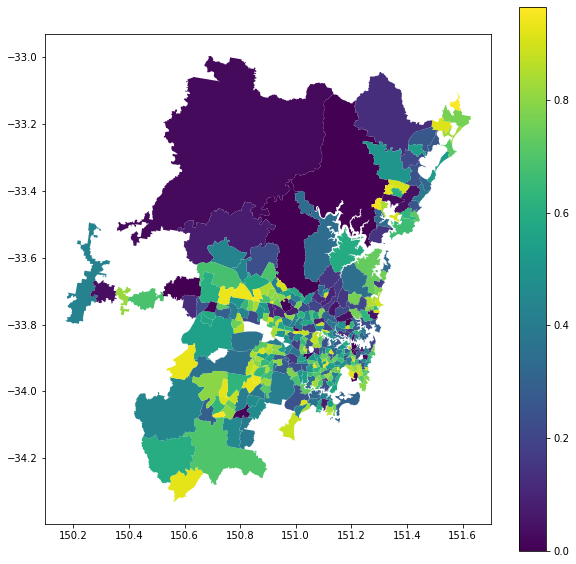

In [177]:
Greater_Sydney.plot(column = 'sigmoidvalue', legend=True, figsize=(10, 10))

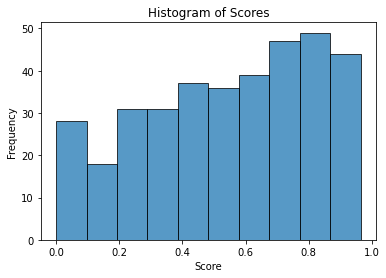

In [178]:
plt.hist(Greater_Sydney['sigmoidvalue'], bins='auto', edgecolor='black', alpha=0.75)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

In [179]:
sql = """
Drop View if exists scores_n_income Cascade;


Create VIEW scores_n_income as
select p.sa2_code, p.sa2_name21, p.sigmoidvalue, p.areasqkm21, p.Population, 
    i.median_income, p.rbz, p.hsz, p.ptsz, p.ppz, p.scz, p.geom
from Plotting_frame p
inner join income i on p.sa2_code = i.sa2_code
;
"""
query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [180]:
Greater_Sydney_income = gpd.read_postgis("SELECT * FROM scores_n_income", conn)

In [181]:
Greater_Sydney_income.dtypes
Greater_Sydney_income[['sa2_code', 'sigmoidvalue', 'areasqkm21', 'population', 'median_income', 'rbz', 'hsz', 'ptsz', 'ppz', 'scz']] = Greater_Sydney_income[['sa2_code', 'sigmoidvalue', 'areasqkm21', 'population', 'median_income', 'rbz', 'hsz', 'ptsz', 'ppz', 'scz']].apply(pd.to_numeric)

In [182]:

GSI = Greater_Sydney_income.to_crs(4326)


m = folium.Map(location=[GSI.geometry.centroid.y.mean(),
                          GSI.geometry.centroid.x.mean()],
                zoom_start=10, control_scale=True, tiles='openstreetmap')
folium.TileLayer(opacity=0.42).add_to(m)


metrics = [('sigmoidvalue', 'Sigmoid Score'),
           ('areasqkm21', 'Area (kms squared)'),
           ('population', 'Population'),
           ('median_income', 'Median Income'),
           ('rbz', 'Retail Z-Score'),
           ('hsz', 'Health Services Z-Score'),
           ('ptsz', 'Public Transport Z-Score'),
           ('ppz', 'Polling Place Z-Score'),
           ('scz', 'School Z-Score')]

# Generate a choropleth map for each metric
for metric, name in metrics:
    choropleth = folium.Choropleth(
      geo_data=GSI.__geo_interface__,
      data=GSI,  
      columns=['sa2_code', metric],
      key_on='feature.properties.sa2_code',
      fill_color='Greys',
      fill_opacity=1,
      line_weight=0.00001,
      line_opacity=0,
      legend_name=name,
      name=name,
      show=False
      ).add_to(m)

    folium.GeoJson(
       GSI,
       name='Popups',
       tooltip=GeoJsonTooltip(
          fields=['sa2_name21', 'sigmoidvalue', 'areasqkm21', 'population', 'median_income', 'rbz', 'hsz', 'ptsz', 'ppz', 'scz'],
          aliases=['Area Name', 'Sigmoid Score', 'Area (kms squared)', 'Population', 'Median Income', 'Retail Z-Score', 'Health Services Z-Score', 'Public Transport Z-Score', 'Polling Place Z-Score', 'School Z-Score'],
          localize=True
          )
          ).add_to(choropleth.geojson)


folium.LayerControl(position='bottomleft').add_to(m)


m.save('/Users/matteo/Documents/Universita/Third_Year/Second_Semester/BigData/Group_Assignment/data2901_project/chloropleth.html')

/var/folders/vz/f1jf304n3fxfxhc14yfh_l_c0000gn/T/ipykernel_54849/2501784472.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[GSI.geometry.centroid.y.mean(),
/var/folders/vz/f1jf304n3fxfxhc14yfh_l_c0000gn/T/ipykernel_54849/2501784472.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  GSI.geometry.centroid.x.mean()],


### Income Dataset Correlation


We'll be calculating the Z score for the median income of each region

In [380]:
pd_income

,sa2_code,sa2_name,earners,median_age,median_income,mean_income
0,101021007,Braidwood,2426,50,44246,61745
1,101021008,Karabar,5128,42,62946,67345
2,101021009,Queanbeyan,6778,39,61724,67276
3,101021010,Queanbeyan - East,3360,40,64010,71770
4,101021011,Queanbeyan Region,13502,44,74042,85303
...,...,...,...,...,...,...
571,128021537,Royal National Park,13,36,38956,61645
572,128021538,Sutherland - Kirrawee,13698,41,62453,71105
573,128021607,Engadine,10335,43,60914,70158
574,128021608,Loftus - Yarrawarrah,4498,45,60469,73218


In [381]:
print(len(pd_income['sa2_code']), len(set(pd_income['sa2_code'])))

570 570


In [382]:
sql = """ 
DROP VIEW IF EXISTS Income_zscore CASCADE;

CREATE VIEW Income_zscore AS

Select  AVG("median_income") as Mean, STDDEV("median_income") as Stddev
from Income;
"""

query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [383]:
sql = """ 
Select * 
from income_zscore 
"""

query(conn, sql)

,mean,stddev
0,51908.450877,10534.322867


In [384]:
sql = """ 

Drop View if exists IncomeScore;

Create view IncomeScore as
Select i.sa2_code, (i.median_income - z.mean) / z.stddev as "z_score"
from income_zscore z
Natural Join Income i;
"""
query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [385]:
sql = """ 
Select * from IncomeScore
"""
query(conn, sql)

,sa2_code,z_score
0,101021007,-0.727380
1,101021008,1.047770
2,101021009,0.931768
3,101021010,1.148773
4,101021011,2.101089
...,...,...
565,128021537,-1.229548
566,128021538,1.000971
567,128021607,0.854877
568,128021608,0.812634


In [386]:
sql = """ 
Drop view if exists IncomeSigmoidScoring Cascade;

Create View IncomeSigmoidScoring as
Select sa2_code, 1 / (1 + exp(z_score)) as IncomeSigmoidValue
from IncomeScore

"""
query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


#### Comparing with initial SigmoidScoring 

In [387]:
sql = """ 
Select *
from SigmoidScoring
"""  
query(conn,sql)

,sa2_code,sigmoidvalue
0,102011028,0.720667
1,102011029,0.663297
2,102011030,0.000400
3,102011031,0.039933
4,102011032,0.022918
...,...,...
355,128011602,0.542420
356,128011603,0.838639
357,128011604,0.303178
358,128021608,0.825526


In [388]:
sql = """ 
Select *
from IncomeSigmoidScoring
"""
IncomeSigmoidScoring = query(conn, sql)
IncomeSigmoidScoring

,sa2_code,incomesigmoidvalue
0,101021007,0.674230
1,101021008,0.259654
2,101021009,0.282566
3,101021010,0.240713
4,101021011,0.108991
...,...,...
565,128021537,0.773739
566,128021538,0.268751
567,128021607,0.298411
568,128021608,0.307329


In [389]:
IncomeSigmoidScoring[IncomeSigmoidScoring.incomesigmoidvalue.isna() == True]

,sa2_code,incomesigmoidvalue


In [390]:
sql = """ 
Drop View if exists SigInc Cascade;

Create View SigInc as
Select ss.sa2_code, ss.sigmoidvalue, ins.incomesigmoidvalue
from SigmoidScoring ss
Natural Join IncomeSigmoidScoring ins;
"""


query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [391]:
sql = """ 
Select *
from SigInc
"""
SigInc = query(conn, sql)

In [392]:
sql = """ 
Select Corr (SigmoidValue, IncomeSigmoidValue)
from SigInc
"""
query(conn, sql)

,corr
0,0.168425


##### Linear Regression

In [393]:
SigInc

,sa2_code,sigmoidvalue,incomesigmoidvalue
0,102011028,0.720667,0.487151
1,102011029,0.663297,0.575003
2,102011030,0.000400,0.631634
3,102011031,0.039933,0.584992
4,102011032,0.022918,0.497851
...,...,...,...
242,128011602,0.542420,0.274535
243,128011603,0.838639,0.256292
244,128011604,0.303178,0.268191
245,128021608,0.825526,0.307329


In [394]:
X = SigInc.sigmoidvalue
y = SigInc.incomesigmoidvalue

X = np.asarray(X)
y = np.asarray(y)

X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

0.02836697814036271 [[0.11534174]] [0.3623297]


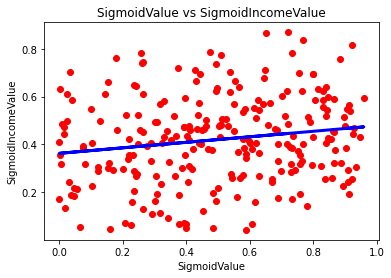

In [395]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)
print( reg.score(X, y), reg.coef_, reg.intercept_)
      
plt.scatter(X, y, color = 'red')
plt.plot(X, reg.predict(X), color='blue', linewidth=3)
plt.title('SigmoidValue vs SigmoidIncomeValue')
plt.xlabel('SigmoidValue')
plt.ylabel('SigmoidIncomeValue')
plt.show()

#### Comparing with new SigmoidScoring

In [396]:
sql = """ 
Select *
from SigmoidNewData
"""  
query(conn,sql)

,sa2_code,sigmoidvalue,cum_score
0,102011028,0.957604,-3.117382
1,102011029,0.904056,-2.243129
2,102011030,0.011528,4.451362
3,102011031,0.033049,3.376152
4,102011032,0.075309,2.507865
...,...,...,...
355,128021536,0.026997,3.584647
356,128021538,0.069299,2.597508
357,128021607,0.044409,3.068881
358,128021608,0.898115,-2.176458


In [397]:
sql = """ 
Select *
from IncomeSigmoidScoring
"""
IncomeSigmoidScoring = query(conn, sql)
IncomeSigmoidScoring

,sa2_code,incomesigmoidvalue
0,101021007,0.674230
1,101021008,0.259654
2,101021009,0.282566
3,101021010,0.240713
4,101021011,0.108991
...,...,...
565,128021537,0.773739
566,128021538,0.268751
567,128021607,0.298411
568,128021608,0.307329


In [398]:
IncomeSigmoidScoring[IncomeSigmoidScoring.incomesigmoidvalue.isna() == True]

,sa2_code,incomesigmoidvalue


In [399]:
sql = """ 
Drop View if exists SigInc Cascade;

Create View SigInc as
Select ss.sa2_code, ss.sigmoidvalue, ins.incomesigmoidvalue
from SigmoidNewData ss
Natural Join IncomeSigmoidScoring ins;
"""


query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [400]:
sql = """ 
Select *
from SigInc
"""
SigInc = query(conn, sql)

In [ ]:
sql = """ 
Select Corr (SigmoidValue, IncomeSigmoidValue)
from SigInc
"""
query(conn, sql)

,corr
0,0.168425


##### Linear Regression

In [ ]:
SigInc

,sa2_code,sigmoidvalue,incomesigmoidvalue
0,102011028,0.720667,0.487151
1,102011029,0.663297,0.575003
2,102011030,0.000400,0.631634
3,102011031,0.039933,0.584992
4,102011032,0.022918,0.497851
...,...,...,...
242,128011602,0.542420,0.274535
243,128011603,0.838639,0.256292
244,128011604,0.303178,0.268191
245,128021608,0.825526,0.307329


In [ ]:
X = SigInc.sigmoidvalue
y = SigInc.incomesigmoidvalue

X = np.asarray(X)
y = np.asarray(y)

X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

0.02836697814036271 [[0.11534174]] [0.3623297]


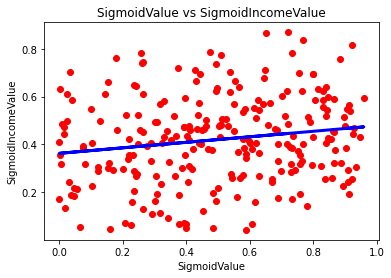

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)
print( reg.score(X, y), reg.coef_, reg.intercept_)
      
plt.scatter(X, y, color = 'red')
plt.plot(X, reg.predict(X), color='blue', linewidth=3)
plt.title('SigmoidValue vs SigmoidIncomeValue')
plt.xlabel('SigmoidValue')
plt.ylabel('SigmoidIncomeValue')
plt.show()

## Task 4 

1. Create a new version of your score using ranks (r) rather than z-scores (z). As a theoretical example, rather than considering a particular SA2 to have 42 public transport stops, you would use the fact that this would rank it 14th of the regions. This will require a new standardisation technique other than the simple sigmoid z-score summation of before, so additionally consider how to convert these values into a comparable, interpretable score. Compare this new score to your previous one from Task 2 - discuss their differences, and conclude which (if any) is more reliable.
2. Use a supervised or unsupervised machine learning technique to add further depth to your results. This task is intentionally
broad to allow creative applications, but some examples could include:
    - A regression model to evaluate which features are statistically significant in predicting the median income of a region. 
    - A decision tree classifier to predict the broader SA3 region of a particular SA2 area, given some of its features.
    - An unsupervised clustering algorithm to find similarities between SA2s that might otherwise not be considered alike.


### Rank based approach

Change this all rank based approach, copy and paste rucha's code

#### Ranks for Stops

In [199]:
# find number of stops
sql = '''
DROP VIEW IF EXISTS stop_counts cascade;

CREATE VIEW stop_counts AS
select sa2.SA2_CODE21, sa2.SA2_NAME21, count(stop_id) 
from sa2
join stops s on st_contains (sa2.geom, s.geom)
join population pop on sa2.sa2_code21 = pop.sa2_code
where sa2.GCC_NAME21 = 'Greater Sydney'
and pop.total_people> 100
group by sa2.SA2_CODE21, sa2.SA2_NAME21
Order by sa2.SA2_CODE21
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [200]:
sql = '''
drop view if exists stops_ranks cascade;
create view stops_ranks as 
select 
    sa2_code21,
    rank() over(
        order by count asc)
        rank
    
from stop_counts
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [201]:
sql = '''
drop view if exists std_ranks_stops;
create view std_ranks_stops as
select sa2_code21, rank, cast(rank as numeric)/(select count(*) from stops_ranks) as standardised
from stops_ranks
group by sa2_code21, rank
order by rank asc
'''

query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [202]:
sql = '''
select * from std_ranks_stops
'''

query(conn, sql)

,sa2_code21,rank,standardised
0,117031639,1,0.002778
1,119041671,1,0.002778
2,117011320,3,0.008333
3,117031646,4,0.011111
4,117031648,5,0.013889
...,...,...,...
355,123021437,356,0.988889
356,102011040,357,0.991667
357,124011452,358,0.994444
358,124011454,359,0.997222


#### Ranks for Businesses 

In [203]:
sql = '''
drop view if exists businesses_ranks cascade;
create view businesses_ranks as 
select 
    b.sa2_code, 
    b.total_businesses,
    rank() over(
        order by b.total_businesses/(cast(pop.total_people as numeric)/1000) asc)
        rank
from businesses b
join sa2 s on (b.sa2_code = s.sa2_code21)
join population pop on (pop.sa2_code = s.sa2_code21)
where industry_name = 'Retail Trade' and s.gcc_name21 = 'Greater Sydney' and pop.total_people > 100
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [204]:
sql = '''
drop view if exists std_ranks_retail;
create view std_ranks_retail as 
select sa2_code, rank, cast(rank as numeric)/(select count(*) from businesses_ranks) as standardised
from businesses_ranks 
group by sa2_code, rank
order by rank asc
'''

query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [205]:
query(conn, 'select * from std_ranks_retail')

,sa2_code,rank,standardised
0,102011035,1,0.002778
1,102021045,2,0.005556
2,124031457,3,0.008333
3,102021050,4,0.011111
4,116031316,5,0.013889
...,...,...,...
355,117031336,356,0.988889
356,117031645,357,0.991667
357,119011355,358,0.994444
358,117011320,359,0.997222


#### Ranks for Healthcare

In [206]:
sql = """
DROP VIEW IF EXISTS healthcare_counts cascade;

CREATE VIEW healthcare_counts AS
Select (SUM(b.total_businesses)::float) / ((SUM(p.total_people)/1000)::float) AS "health services 1000 people", b.sa2_code
from Businesses b
Inner Join Population p on b.sa2_code = p.sa2_code
Inner Join sa2 s on b.sa2_code = s.SA2_CODE21
where lower(b.industry_name) = 'health care and social assistance'
AND lower(s.GCC_NAME21) = 'greater sydney'
and p.total_people > 100
Group By b.sa2_code
Having SUM(p.total_people)/1000 != 0;
"""
query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [207]:
sql = '''drop view if exists healthcare_ranks cascade;
create view healthcare_ranks as 
select 
    sa2_code, 
    "health services 1000 people" as health_services,
    rank() over(
        order by "health services 1000 people" asc)
        rank
from healthcare_counts
'''
query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [208]:
sql = '''
drop view if exists std_ranks_healthcare;
create view std_ranks_healthcare as 
select sa2_code, rank, cast(rank as numeric)/(select count(*) from healthcare_ranks) as standardised
from healthcare_ranks 
group by sa2_code, rank
order by rank asc
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [209]:
sql = '''
select * from std_ranks_healthcare
'''

query(conn, sql)

,sa2_code,rank,standardised
0,124031465,1,0.002778
1,115031299,2,0.005556
2,124031457,3,0.008333
3,124041468,4,0.011111
4,102021045,5,0.013889
...,...,...,...
355,121011401,356,0.988889
356,118011650,357,0.991667
357,118011341,358,0.994444
358,115011291,359,0.997222


#### Ranks for Polls

In [210]:
sql = '''
drop view if exists poll_counts cascade;
create view poll_counts as 
select sa2_code21, count(polling_place_id)
from polls p
join sa2 on st_contains(sa2.geom, p.geom)
join population pop on (sa2.sa2_code21 = pop.sa2_code)
where gcc_name21 = 'Greater Sydney'
and pop.total_people > 100
group by sa2_code21
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [211]:
sql = "select * from poll_counts"
query(conn, sql)

,sa2_code21,count
0,102011028,2
1,102011029,2
2,102011030,7
3,102011031,6
4,102011032,7
...,...,...
347,128021536,7
348,128021538,6
349,128021607,7
350,128021608,2


In [212]:
sql = '''create view polls_ranks as 
select 
    sa2_code21, 
    count,
    rank() over(
        order by count asc)
        rank
from poll_counts
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [213]:
sql = '''
drop view if exists std_ranks_polls;
create view std_ranks_polls as 
select sa2_code21, rank, cast(rank as numeric)/(select count(*) from polls_ranks) as standardised
from polls_ranks 
group by sa2_code21, rank
order by rank asc
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [214]:
sql = '''
select * from std_ranks_polls
'''

query(conn, sql)

,sa2_code21,rank,standardised
0,102011035,1,0.002841
1,102011036,1,0.002841
2,102021051,1,0.002841
3,115011294,1,0.002841
4,115011556,1,0.002841
...,...,...,...
347,124031464,348,0.988636
348,121011684,349,0.991477
349,125041717,350,0.994318
350,117031645,351,0.997159


#### Ranks for Schools

In [215]:
sql = '''

select * from population
'''

query(conn, sql)

,sa2_code,sa2_name,0-4_people,young_people,total_people
0,102011028,Avoca Beach - Copacabana,424.0,2121.0,7530.0
1,102011029,Box Head - MacMasters Beach,511.0,2471.0,11052.0
2,102011030,Calga - Kulnura,200.0,961.0,4748.0
3,102011031,Erina - Green Point,683.0,3205.0,14803.0
4,102011032,Gosford - Springfield,1164.0,4364.0,21346.0
...,...,...,...,...,...
355,128021536,Oyster Bay - Como - Jannali,1331.0,6212.0,22151.0
356,128021538,Sutherland - Kirrawee,1519.0,5078.0,23369.0
357,128021607,Engadine,1157.0,5118.0,17379.0
358,128021608,Loftus - Yarrawarrah,503.0,2073.0,7354.0


In [216]:
sql = '''

drop view if exists school_counts cascade;
create view school_counts as 
select sa.sa2_code21, count(sc.use_id)
from sa2 sa
join schools sc on st_intersects(sa.geom, sc.geom)
join population pop on sa.sa2_code21 = pop.sa2_code
where sa.gcc_name21 = 'Greater Sydney'
and pop.total_people > 100
group by sa.sa2_code21
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [217]:
sql = '''
drop view if exists schools_per1000;
create view schools_per1000 as 
select sa2_code21, (cast(count as numeric)/(cast(total_people as numeric)/1000)) as per_1000
from school_counts 
join population p on (sa2_code21 = sa2_code)
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [218]:
sql = '''
create view schools_ranks as 
select 
    sa2_code21, 
    rank() over(
        order by per_1000 asc)
        rank
from schools_per1000
'''

query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [219]:
sql = '''
drop view if exists std_ranks_schools;
create view std_ranks_schools as
select sa2_code21, rank, cast(rank as numeric)/(select count(*) from schools_ranks) as standardised
from schools_ranks
group by sa2_code21, rank
order by rank asc
'''

query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


#### Combining all ranks 

In [220]:
sql = '''

drop view if exists rank_scores;
create view rank_scores as 
select sa2.sa2_code21, sum(st.standardised+r.standardised+h.standardised+p.standardised+sc.standardised) as score
from sa2
left join std_ranks_stops st on sa2.sa2_code21 = st.sa2_code21
left join std_ranks_retail r on sa2.sa2_code21 = r.sa2_code
left join std_ranks_healthcare h on sa2.sa2_code21 = h.sa2_code
left join std_ranks_polls p on sa2.sa2_code21 = p.sa2_code21
left join std_ranks_schools sc on sa2.sa2_code21 = sc.sa2_code21 
left join population pop on sa2.sa2_code21 = pop.sa2_code
where sa2.gcc_name21 = 'Greater Sydney' and pop.total_people > 100
group by sa2.sa2_code21
'''

query(conn, sql)


Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [221]:
sql = '''
drop view if exists income_ranks cascade;
create view income_ranks as 
select i.sa2_code, rank() over(order by median_income asc) as rank
from income i
join sa2 on (i.sa2_code = sa2_code21)
join population p on (sa2_code21 = p.sa2_code)
where gcc_name21 = 'Greater Sydney'
and total_people > 100 
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [222]:
sql = '''
drop view if exists std_ranks_income;
create view std_ranks_income as
select sa2_code, rank, cast(rank as numeric)/(select count(*) from income_ranks) as standardised
from income_ranks
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [223]:
query(conn, "select * from std_ranks_income")

,sa2_code,rank,standardised
0,125011583,1,0.004049
1,125011582,2,0.008097
2,119021573,3,0.012146
3,119021574,4,0.016194
4,125031481,5,0.020243
...,...,...,...
242,121041417,243,0.983806
243,117031330,244,0.987854
244,120021389,245,0.991903
245,121011401,246,0.995951


In [224]:
sql = '''

drop view if exists scores;
create view scores as 
select sa2_code, standardised as income_std_rank, score
from std_ranks_income i 
left join rank_scores s on (i.sa2_code = s.sa2_code21)
'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [225]:
sql = '''
select sa2_code21, income_std_rank, score
from scores
join sa2 on scores.sa2_code = sa2.sa2_code21
'''

scores_geom = query(conn, sql)

In [226]:
scores_geom

,sa2_code21,income_std_rank,score
0,125011583,0.004049,2.119508
1,125011582,0.008097,2.408396
2,119021573,0.012146,2.211174
3,119021574,0.016194,1.549684
4,125031481,0.020243,2.588573
...,...,...,...
242,121041417,0.983806,2.848801
243,117031330,0.987854,2.598801
244,120021389,0.991903,3.075442
245,121011401,0.995951,2.902841


#### Assessing the rank based approach

In [227]:
scores_geom.dropna(axis = 0, how = 'any', inplace = True)
corr = scores_geom['score'].corr(scores_geom['income_std_rank'])
corr

0.1426017720291561

0.1426017720291561


Text(0, 0.5, 'Standardized Income')

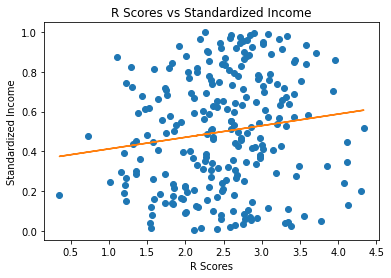

In [257]:
import matplotlib.pyplot as plt
import numpy as np


x = scores_geom['score']
y = scores_geom['income_std_rank']

print(x.corr(y))

#converting to a numpy array
x = np.asarray(x)
y = np.asarray(y)


#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)


plt.title('R Scores vs Standardized Income')
plt.xlabel('R Scores')
plt.ylabel('Standardized Income')


In [229]:
# import os 
# pwd = os.getcwd()
# scores_geom.to_csv('scores.csv', sep = ",")

In [230]:
sql = """ 
Select * from SigmoidScoring
"""
Sigmoid_scores = query(conn, sql)
Sigmoid_scores

,sa2_code,sigmoidvalue
0,102011028,0.720667
1,102011029,0.663297
2,102011030,0.000400
3,102011031,0.039933
4,102011032,0.022918
...,...,...
355,128011602,0.542420
356,128011603,0.838639
357,128011604,0.303178
358,128021608,0.825526


In [231]:
Sigmoid_scores.isna().any()

sa2_code        False
sigmoidvalue    False
dtype: bool

In [232]:
sql = """ 
Select * from rank_scores
"""
rank_scores = query(conn, sql)
rank_scores

,sa2_code21,score
0,102011028,2.346907
1,102011029,1.849684
2,102011030,4.124811
3,102011031,4.303220
4,102011032,3.849811
...,...,...
355,128021536,2.477588
356,128021538,2.953220
357,128021607,2.347033
358,128021608,1.735795


In [233]:
idx = rank_scores[rank_scores.score.isna() == True].index

In [234]:
rank_scores.drop(idx, inplace = True)
Sigmoid_scores.drop(idx, inplace = True)
rank_scores[rank_scores.score.isna() == True].index

Index([], dtype='int64')

-0.2109452168331094


Text(0, 0.5, 'Sigmoid Value')

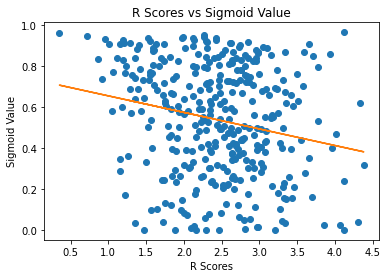

In [258]:
x = rank_scores['score']
y = Sigmoid_scores['sigmoidvalue']

print(x.corr(y))

#converting to a numpy array
x = np.asarray(x)
y = np.asarray(y)

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)


plt.title('R Scores vs Sigmoid Value')
plt.xlabel('R Scores')
plt.ylabel('Sigmoid Value')

### Machine learning approach

Some options: 
1. Random forest
2. Support Vector Machine 
3. Linear regression is unlikely to be accurate, based on the results from the scores above
4. KNN? 

#### Random Forest - using ranks

In [236]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config
import numpy as np

In [237]:
sql = '''
drop view if exists ranks_for_ml;
create view ranks_for_ml as 
select sa2.sa2_code21, st.standardised as stops_std, r.standardised as retail_std, h.standardised as health_std, p.standardised as polls_std, sc.standardised as schools_std, i.standardised as income_std
from sa2
left join std_ranks_stops st on sa2.sa2_code21 = st.sa2_code21
left join std_ranks_retail r on sa2.sa2_code21 = r.sa2_code
left join std_ranks_healthcare h on sa2.sa2_code21 = h.sa2_code
left join std_ranks_polls p on sa2.sa2_code21 = p.sa2_code21
left join std_ranks_schools sc on sa2.sa2_code21 = sc.sa2_code21 
left join population pop on sa2.sa2_code21 = pop.sa2_code
left join std_ranks_income i on sa2.sa2_code21 = i.sa2_code
where sa2.gcc_name21 = 'Greater Sydney' and pop.total_people > 100
group by sa2.sa2_code21, st.standardised, r.standardised, h.standardised, p.standardised, sc.standardised, i.standardised

'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [238]:
sql = '''
select * from ranks_for_ml
'''

ranks_for_ml = query(conn, sql)

In [239]:
ranks_for_ml

,sa2_code21,stops_std,retail_std,health_std,polls_std,schools_std,income_std
0,102011028,0.447222,0.511111,0.755556,0.110795,0.522222,0.340081
1,102011029,0.780556,0.261111,0.380556,0.110795,0.316667,0.214575
2,102011030,0.616667,0.925000,0.722222,0.866477,0.994444,0.129555
3,102011031,0.936111,0.886111,0.877778,0.769886,0.833333,0.202429
4,102011032,0.983333,0.777778,0.886111,0.866477,0.336111,0.323887
...,...,...,...,...,...,...,...
355,128021536,0.883333,0.200000,0.280556,0.866477,0.247222,0.842105
356,128021538,0.711111,0.397222,0.636111,0.769886,0.438889,0.785425
357,128021607,0.797222,0.150000,0.300000,0.866477,0.233333,0.736842
358,128021608,0.522222,0.158333,0.083333,0.110795,0.861111,0.716599


In [240]:
# ranks_db.to_csv('ranks.csv')

In [241]:
ranks_for_ml.dropna(axis = 0, how = 'any', inplace = True)


In [242]:
x = ranks_for_ml.iloc[:, 1:6] 
y = ranks_for_ml.iloc[:, 6]

In [243]:
x

,stops_std,retail_std,health_std,polls_std,schools_std
0,0.447222,0.511111,0.755556,0.110795,0.522222
1,0.780556,0.261111,0.380556,0.110795,0.316667
2,0.616667,0.925000,0.722222,0.866477,0.994444
3,0.936111,0.886111,0.877778,0.769886,0.833333
4,0.983333,0.777778,0.886111,0.866477,0.336111
...,...,...,...,...,...
355,0.883333,0.200000,0.280556,0.866477,0.247222
356,0.711111,0.397222,0.636111,0.769886,0.438889
357,0.797222,0.150000,0.300000,0.866477,0.233333
358,0.522222,0.158333,0.083333,0.110795,0.861111


In [244]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
import numpy as np 

#number of trees in the forest 
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

#max number of features used for each tree 
max_features = [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)]

#maximum number of levels in each decision tree 
max_depth = [int(x) for x in np.linspace(10, 110, num =11)]
max_depth.append(None)

#minimum number of samples required to split a node 
min_samples_split = [2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               }
pprint(random_grid)


{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [245]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring ="neg_root_mean_squared_error" )
# Fit the random search model
rf_random.fit(x, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=110, max_features=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=110, max_features=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=110, max_features=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=110, max_features=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=110, max_features=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=70, max_features=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=70, max_features=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=70, max_features=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=70, max_features=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=70, max_features=2, min_samples_split=5, 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [246]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'max_features': 3,
 'max_depth': 50}

In [247]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=50, max_features=3, n_estimators=50)

In [248]:
rf_random.best_score_

-0.26428752700343117

In [249]:
rf_random.cv_results_

{'mean_fit_time': array([0.09864869, 0.19448886, 0.45847039, 0.13348594, 0.08560901,
        0.04822278, 0.41322803, 0.11727824, 0.44091144, 0.25356426,
        0.12188916, 0.42034802, 0.24527507, 0.09178481, 0.10755124,
        0.18560066, 0.25109396, 0.08153749, 0.46625628, 0.48791547,
        0.11569934, 0.09308214, 0.39360876, 0.17017398, 0.27970481,
        0.04532919, 0.28379822, 0.04439702, 0.19178634, 0.16056142,
        0.23012919, 0.53955989, 0.10190043, 0.25450363, 0.54983244,
        0.1052896 , 0.21037307, 0.45116096, 0.41369586, 0.05260653,
        0.34514055, 0.27789063, 0.05035372, 0.15764613, 0.09856524,
        0.30266442, 0.45899329, 0.24625115, 0.22799916, 0.19012117]),
 'std_fit_time': array([0.00984388, 0.01407695, 0.05361862, 0.01329515, 0.00761309,
        0.01097559, 0.0159365 , 0.01132992, 0.01520125, 0.02381956,
        0.01066101, 0.00756009, 0.01538237, 0.01669569, 0.01866562,
        0.04000246, 0.00882644, 0.01748751, 0.03139858, 0.02067057,
        0.015

#### Random Forest - not using ranks

In [250]:
#create some indices

# create indices
# sql = '''
# create index sa2_idx 
# on sa2
# using gist(geom);

# --create index stops_idx
# --on stops 
# --using gist(geom);

# sql = '''
# drop index if exists sa2_idx;
# create index sa2_idx
# on sa2 
# using gist(geom);

# drop index if exists stops_idx;
# create index stops_idx 
# on stops 
# using gist(geom);

# drop index if exists polls_idx;
# create index polls_idx
# on polls 
# using gist(geom);

# drop index if exists schools_idx;
# create index schools_idx
# on schools 
# using gist(geom);
# '''

# query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [251]:
sql = '''
drop view if exists businesses_counts cascade;
create view businesses_counts as 
select 
    b.sa2_code, 
    b.total_businesses,
    b.total_businesses/(cast(pop.total_people as numeric)/1000) as retail_per1000
from businesses b
join sa2 s on (b.sa2_code = s.sa2_code21)
join population pop on (pop.sa2_code = s.sa2_code21)
where industry_name = 'Retail Trade' and s.gcc_name21 = 'Greater Sydney' and pop.total_people > 100

'''

query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [252]:
sql = '''
select sa2.sa2_code21, b.retail_per1000 as retail_per_1000, h.health_per_1000 as health_per_1000, st.count as stops, sc.count as schools, p.count as polls, i.median_income
from sa2
join businesses_counts b on (b.sa2_code = sa2.sa2_code21)
join healthcare_counts h on (h.sa2_code = sa2.sa2_code21)
join stop_counts st on (st.sa2_code21 = sa2.sa2_code21)
join school_counts sc on (sc.sa2_code21 = sa2.sa2_code21)
join poll_counts p on (p.sa2_code21 = sa2.sa2_code21)
join income i on (sa2.sa2_code21 = i.sa2_code)
where sa2.gcc_name21 = 'Greater Sydney'
'''

ml_db = query(conn, sql)

Error encountered: 
(psycopg2.errors.UndefinedColumn) column h.health_per_1000 does not exist
LINE 2: ....sa2_code21, b.retail_per1000 as retail_per_1000, h.health_p...
                                                             ^

[SQL: 
select sa2.sa2_code21, b.retail_per1000 as retail_per_1000, h.health_per_1000 as health_per_1000, st.count as stops, sc.count as schools, p.count as polls, i.median_income
from sa2
join businesses_counts b on (b.sa2_code = sa2.sa2_code21)
join healthcare_counts h on (h.sa2_code = sa2.sa2_code21)
join stop_counts st on (st.sa2_code21 = sa2.sa2_code21)
join school_counts sc on (sc.sa2_code21 = sa2.sa2_code21)
join poll_counts p on (p.sa2_code21 = sa2.sa2_code21)
join income i on (sa2.sa2_code21 = i.sa2_code)
where sa2.gcc_name21 = 'Greater Sydney'
]
(Background on this error at: https://sqlalche.me/e/20/f405)


In [253]:
ml_db

""


In [254]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.model_selection import train_test_split
import numpy as np

In [255]:
ml_db.dropna(axis = 0, how = 'any', inplace = True)
ml_db

""


In [256]:
x = ml_db.iloc[:, 1:6]
y = ml_db.iloc[:, 6]

IndexError: single positional indexer is out-of-bounds

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
import numpy as np 

#number of trees in the forest 
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

#max number of features used for each tree 
max_features = [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)]

#maximum number of levels in each decision tree 
max_depth = [int(x) for x in np.linspace(10, 110, num =11)]
max_depth.append(None)

#minimum number of samples required to split a node 
min_samples_split = [2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               }
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 40)
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=40, n_jobs = -1, scoring ="neg_root_mean_squared_error", refit = True )
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=50, max_features=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=50, max_features=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=50, max_features=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=50, max_features=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=50, max_features=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=1, min_samples_split=10, n_estimators=350; total time=   0.7s
[CV] END max_depth=20, max_features=1, min_samples_split=10, n_estimators=350; total time=   0.7s
[CV] END max_depth=20, max_features=1, min_samples_split=10, n_estimators=350; total time=   0.7s
[CV] END max_depth=20, max_features=1, min_samples_split=10, n_estimators=350; total time=   0.7s
[CV] END max_depth=80, max_features=4, min_samples_split=10, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=40, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [ ]:
best_params = rf_random.best_params_
best_params

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_features': 1,
 'max_depth': 80}

In [ ]:
rf_random.best_score_

-7916.344956908359

In [ ]:
y_pred = rf_random.predict(x_test)
y_pred

array([56091.41273016, 60533.22625289, 55334.05839935, 55758.08797619,
       65467.39169048, 48017.73643651, 64118.41532359, 58397.53691919,
       55211.39331349, 55932.45360714, 54019.18650794, 54141.31676407,
       59325.70912554, 50866.9537619 , 56718.63322619, 54575.45099315,
       53794.29861833, 55077.09107143, 61159.58179762, 53097.94981349,
       53316.68097006, 55633.76877381, 59935.37420238, 54685.98605556,
       49602.46665079, 58277.53216667, 55998.15497619, 60926.45147222,
       53396.34837987, 55039.76987698, 57390.3179881 , 54476.40470238,
       55024.18367749, 53183.24227381, 54192.61759524, 54478.42734127,
       54811.25670887, 57161.90636905, 56167.03068146, 55347.40034524,
       63579.75092063, 54864.64673413, 63211.62335931, 52402.71748413,
       54968.9105754 , 69018.87829726, 51847.48153571, 53418.01310714,
       53068.1704246 ])

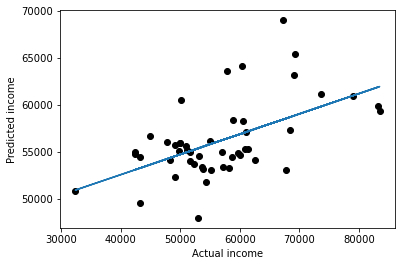

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


#create basic scatterplot
plt.plot(y_test, y_pred, 'ko')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test, y_pred, 1)

#add linear regression line to scatterplot 
plt.plot(y_test, m*y_test+b)
plt.xlabel('Actual income')
plt.ylabel('Predicted income')

r,p = stats.pearsonr(x = y_test, y = y_pred)

In [ ]:
r

0.5539614767611023

In [ ]:
p

3.639305622338789e-05

Text(0.5, 0, 'Income')

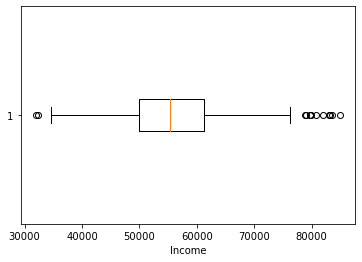

In [ ]:
ax = plt.boxplot(y, vert = False)
plt.ylabel(ylabel = None)
plt.xlabel('Income')


#### Clustering ?

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ranks_for_ml.drop(ranks_for_ml[ranks_for_ml.isnull().values == True].index, inplace = True)
ranks_for_ml[ranks_for_ml.isnull().values == True].index
ranks_for_ml


,sa2_code21,stops_std,retail_std,health_std,polls_std,schools_std,income_std
0,102011028,0.447222,0.511111,0.755556,0.110795,0.522222,0.340081
1,102011029,0.780556,0.261111,0.380556,0.110795,0.316667,0.214575
2,102011030,0.616667,0.925000,0.722222,0.866477,0.994444,0.129555
3,102011031,0.936111,0.886111,0.877778,0.769886,0.833333,0.202429
4,102011032,0.983333,0.777778,0.886111,0.866477,0.336111,0.323887
...,...,...,...,...,...,...,...
355,128021536,0.883333,0.200000,0.280556,0.866477,0.247222,0.842105
356,128021538,0.711111,0.397222,0.636111,0.769886,0.438889,0.785425
357,128021607,0.797222,0.150000,0.300000,0.866477,0.233333,0.736842
358,128021608,0.522222,0.158333,0.083333,0.110795,0.861111,0.716599


In [ ]:
data = ranks_for_ml.iloc[:, 1:6] 
data

,stops_std,retail_std,health_std,polls_std,schools_std
0,0.447222,0.511111,0.755556,0.110795,0.522222
1,0.780556,0.261111,0.380556,0.110795,0.316667
2,0.616667,0.925000,0.722222,0.866477,0.994444
3,0.936111,0.886111,0.877778,0.769886,0.833333
4,0.983333,0.777778,0.886111,0.866477,0.336111
...,...,...,...,...,...
355,0.883333,0.200000,0.280556,0.866477,0.247222
356,0.711111,0.397222,0.636111,0.769886,0.438889
357,0.797222,0.150000,0.300000,0.866477,0.233333
358,0.522222,0.158333,0.083333,0.110795,0.861111


In [ ]:
data = data.to_numpy()
data

array([[0.44722222, 0.51111111, 0.75555556, 0.11079545, 0.52222222],
       [0.78055556, 0.26111111, 0.38055556, 0.11079545, 0.31666667],
       [0.61666667, 0.925     , 0.72222222, 0.86647727, 0.99444444],
       ...,
       [0.79722222, 0.15      , 0.3       , 0.86647727, 0.23333333],
       [0.52222222, 0.15833333, 0.08333333, 0.11079545, 0.86111111],
       [0.03333333, 0.01944444, 0.25833333, 0.00284091, 0.96944444]])

##### Choosing the best one

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
pred_clus = kmeans.fit_predict(data)
cl2_k = (pred_clus == 1)
cl1_k = (pred_clus == 0)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=42,
                     covariance_type = "diag")
pred_mix = gm.fit_predict(data)
cl2 = (pred_mix == 1)
cl1 = (pred_mix == 0)



In [ ]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=2, random_state=42)
pred_bgm = bgm.fit_predict(data)
bgm1 = (pred_mix == 0)
bgm2 = (pred_mix == 1)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

aggl = AgglomerativeClustering(n_clusters=2)
pred_mix = aggl.fit_predict(data)
ag1 = (pred_mix == 0)
ag2 = (pred_mix == 1)

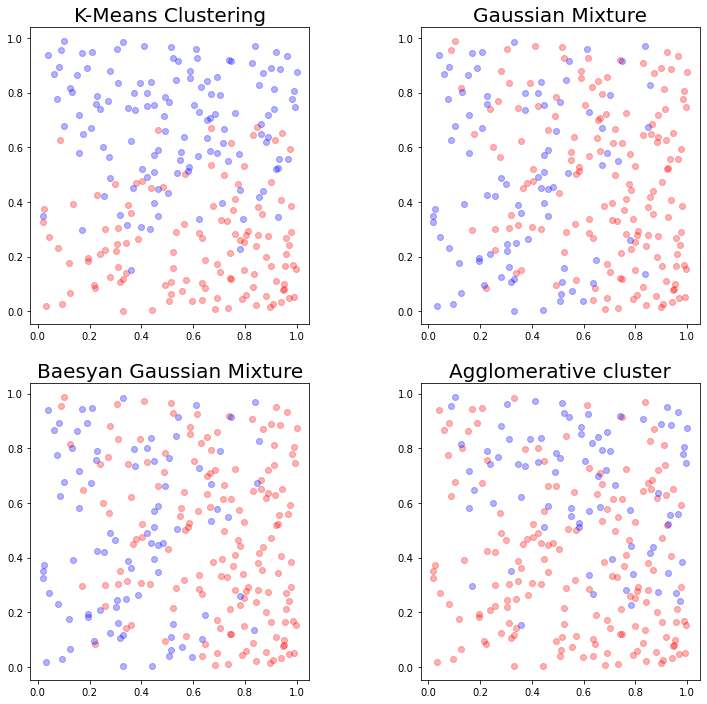

In [ ]:
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.set_title('K-Means Clustering', fontsize = 20)

ax2.set_title('Gaussian Mixture', fontsize = 20)

ax3.set_title('Baesyan Gaussian Mixture', fontsize = 20)

ax4.set_title('Agglomerative cluster', fontsize = 20)


ax1.scatter(data[cl1_k,0],data[cl1_k,1], c="r",alpha = 0.3)
ax1.scatter(data[cl2_k,0],data[cl2_k,1], c="b",alpha = 0.3)

ax2.scatter(data[cl1,0],data[cl1,1], c="r",alpha = 0.3)
ax2.scatter(data[cl2,0],data[cl2,1], c="b",alpha = 0.3)

ax3.scatter(data[bgm1,0],data[bgm1,1], c="r",alpha = 0.3)
ax3.scatter(data[bgm2,0],data[bgm2,1], c="b",alpha = 0.3)

ax4.scatter(data[ag1,0],data[ag1,1], c="r",alpha = 0.3)
ax4.scatter(data[ag2,0],data[ag2,1], c="b",alpha = 0.3)



plt.subplots_adjust(wspace=0.4)


## Close Connection

In [3]:
conn.close()
db.dispose()